In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import csv 
from os import path
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import HardwareVersusSoftware as hvs
importlib.reload(hvs)
import Salary as salary
importlib.reload(salary)
import wordclouds as wc
importlib.reload(wc)
import location_visulization as v_tools

<module 'wordclouds' from '/Users/ashleyfreeman/Desktop/USE THIS/FINAL SUBMISSION/wordclouds.py'>

In [257]:
path_of_datasets="/Users/ashleyfreeman/Desktop/143_datasets/" #insert the path the datasets
path=path_of_datasets
intel_data = pd.read_csv(path_of_datasets +"Intel.csv", index_col=0)
cisco_data = pd.read_csv(path_of_datasets+"Cisco.csv", index_col=0)
northrop_data=pd.read_csv(path_of_datasets+ "northrop.csv", index_col=0)
ms_data = pd.read_csv(path_of_datasets+"ms.csv", index_col=0)
apple_data = pd.read_csv(path_of_datasets+"apple.csv", index_col=0)
amazon_data = pd.read_csv(path_of_datasets+"amazon.csv", index_col=0)
google_data = pd.read_csv(path_of_datasets+"google.csv", index_col=0)
ge_data = pd.read_csv(path_of_datasets+"ge.csv", index_col=0)
ca_data = pd.read_csv(path_of_datasets+"ca.csv")

google_data = pd.read_csv(path+"dataset_sde/google.csv")
amazon_data = pd.read_csv(path +"dataset_sde/amazon.csv")
ms_data = pd.read_csv(path +"dataset_sde/ms.csv")
app_data = pd.read_csv(path +"dataset_sde/apple.csv")
#for hardware
cisco_data = pd.read_csv(path+"dataset_hard/Cisco.csv")
ibm_data = pd.read_csv(path+"dataset_hard/IBM.csv")
intel_data = pd.read_csv(path+"dataset_hard/Intel.csv")
qualcomm_data = pd.read_csv(path+"dataset_hard/qualcomm.csv")
north_data = pd.read_csv(path+"dataset_hard/northrop.csv")
ge_data = pd.read_csv(path+"dataset_hard/ge.csv")

sde_data = pd.concat( [google_data,ms_data,amazon_data,app_data], axis=0 )
hd_data = pd.concat( [ge_data,intel_data,north_data,qualcomm_data], axis=0 )

# Preprocessing Data

In [258]:
#need to preprocess data here
sw_keywords = ["it","software", "sde", "programmer", "programming", "developer","IT","Software", "SDE", "Programmer", "Programming", "Developer"]
hw_keywords = ["electrical","hardware", "electronics", "semiconductor", "embedded", "circuit", "fpga", "component", "Electrical","Hardware", "Electronics", "Semiconductor", "Embedded", "Circuit", "FPGA", "Component", "HW", "Network", "Processor"]
dummy_keywords=['associate', 'Senior']


In [259]:
#setting up hardware company data
intel_HW=hvs.preprocess(intel_data, hw_keywords)
cisco_HW=hvs.preprocess(cisco_data, hw_keywords)
northrop_HW=hvs.preprocess(northrop_data, hw_keywords)
ge_HW=hvs.preprocess(ge_data, hw_keywords)

#setting up software company data
ms_SW=hvs.preprocess(ms_data, sw_keywords)
apple_SW=hvs.preprocess(apple_data, sw_keywords)
google_SW=hvs.preprocess(google_data, sw_keywords)
amazon_SW=hvs.preprocess(amazon_data, sw_keywords)
northrop_SW=hvs.preprocess(northrop_data, sw_keywords)
ge_SW=hvs.preprocess(ge_data, sw_keywords)
intel_SW=hvs.preprocess(intel_data, sw_keywords)
cisco_SW=hvs.preprocess(cisco_data, sw_keywords)

In [ ]:
df_gg = v_tools.preprocess(google_data,sw_keywords)
df_amazon = v_tools.preprocess(amazon_data,sw_keywords)
df_app = v_tools.preprocess(app_data, sw_keywords)
df_ms = v_tools.preprocess(ms_data,sw_keywords)

df_intel = v_tools.preprocess(intel_data,hw_keywords)
df_north = v_tools.preprocess(north_data,hw_keywords)
df_cisco= v_tools.preprocess(cisco_data,hw_keywords)
df_ge = v_tools.preprocess(ge_data,hw_keywords)

df_hd = pd.concat( [df_intel,df_north,df_ge,df_cisco], axis=0 )
df_sde = pd.concat( [df_gg,df_amazon,df_app,df_ms], axis=0 )

# Calculating average ratings for hardware and software companies

In [260]:
#need to get average ratings for HW
    #overall ratings
overall_intel_hw=hvs.getavg(intel_HW, 'overall_rating')
overall_cisco_hw=hvs.getavg(cisco_HW, 'overall_rating')
overall_northrop_hw=hvs.getavg(northrop_HW, 'overall_rating')
overall_ge_hw=hvs.getavg(ge_HW, 'overall_rating')
    #worklifebalance
worklife_intel_hw=hvs.getavg(intel_HW, 'work_life_balance_rating')
worklife_cisco_hw=hvs.getavg(cisco_HW, 'work_life_balance_rating')
worklife_northrop_hw=hvs.getavg(northrop_HW, 'work_life_balance_rating')
worklife_ge_hw=hvs.getavg(ge_HW, 'work_life_balance_rating')
    #culture rating
culture_intel_hw=hvs.getavg(intel_HW, 'culture_values_rating')
culture_cisco_hw=hvs.getavg(cisco_HW, 'culture_values_rating')
culture_northrop_hw=hvs.getavg(northrop_HW, 'culture_values_rating')
culture_ge_hw=hvs.getavg(ge_HW, 'culture_values_rating')
    #career opportunities
opportunities_intel_hw=hvs.getavg(intel_HW, 'career_opportunities_rating')
opportunities_cisco_hw=hvs.getavg(cisco_HW, 'career_opportunities_rating')
opportunities_northrop_hw=hvs.getavg(northrop_HW, 'career_opportunities_rating')
opportunities_ge_hw=hvs.getavg(ge_HW, 'career_opportunities_rating')
    #benefits ratings
benefits_intel_hw=hvs.getavg(intel_HW, 'comp_benefits_rating')
benefits_cisco_hw=hvs.getavg(cisco_HW, 'comp_benefits_rating')
benefits_northrop_hw=hvs.getavg(northrop_HW, 'comp_benefits_rating')
benefits_ge_hw=hvs.getavg(ge_HW, 'comp_benefits_rating')
    #management ratings
management_intel_hw=hvs.getavg(intel_HW, 'senior_management_rating')
management_cisco_hw=hvs.getavg(cisco_HW, 'senior_management_rating')
management_northrop_hw=hvs.getavg(northrop_HW, 'senior_management_rating')
management_ge_hw=hvs.getavg(ge_HW, 'senior_management_rating')

ratings_overall_hw=(overall_intel_hw, overall_cisco_hw, overall_northrop_hw, overall_ge_hw)
ratings_worklife_hw=(worklife_intel_hw, worklife_cisco_hw, worklife_northrop_hw, worklife_ge_hw)
ratings_culture_hw=(culture_intel_hw, culture_cisco_hw, culture_northrop_hw, culture_ge_hw)
ratings_opportunities_hw=(opportunities_intel_hw, opportunities_cisco_hw, opportunities_northrop_hw, opportunities_ge_hw)
ratings_benefits_hw=(benefits_intel_hw, benefits_cisco_hw, benefits_northrop_hw, benefits_ge_hw)
ratings_management_hw=(management_intel_hw, management_cisco_hw, management_northrop_hw, management_ge_hw)



#ratings for software
    #overall ratings
overall_intel_sw=hvs.getavg(intel_SW, 'overall_rating')
overall_cisco_sw=hvs.getavg(cisco_SW, 'overall_rating')
overall_northrop_sw=hvs.getavg(northrop_SW, 'overall_rating')
overall_ge_sw=hvs.getavg(ge_SW, 'overall_rating')
overall_apple_sw=hvs.getavg(apple_SW, 'overall_rating')
overall_google_sw=hvs.getavg(google_SW, 'overall_rating')
overall_amazon_sw=hvs.getavg(amazon_SW, 'overall_rating')
overall_ms_sw=hvs.getavg(ms_SW, 'overall_rating')
    #worklifebalance
worklife_intel_sw=hvs.getavg(intel_SW, 'work_life_balance_rating')
worklife_cisco_sw=hvs.getavg(cisco_SW, 'work_life_balance_rating')
worklife_northrop_sw=hvs.getavg(northrop_SW, 'work_life_balance_rating')
worklife_ge_sw=hvs.getavg(ge_SW, 'work_life_balance_rating')
worklife_apple_sw=hvs.getavg(apple_SW, 'work_life_balance_rating')
worklife_google_sw=hvs.getavg(google_SW, 'work_life_balance_rating')
worklife_amazon_sw=hvs.getavg(amazon_SW, 'work_life_balance_rating')
worklife_ms_sw=hvs.getavg(ms_SW,'work_life_balance_rating')
    #culture rating
culture_intel_sw=hvs.getavg(intel_SW, 'culture_values_rating')
culture_cisco_sw=hvs.getavg(cisco_SW, 'culture_values_rating')
culture_northrop_sw=hvs.getavg(northrop_SW, 'culture_values_rating')
culture_ge_sw=hvs.getavg(ge_SW, 'culture_values_rating')
culture_apple_sw=hvs.getavg(apple_SW, 'culture_values_rating')
culture_google_sw=hvs.getavg(google_SW, 'culture_values_rating')
culture_amazon_sw=hvs.getavg(amazon_SW, 'culture_values_rating')
culture_ms_sw=hvs.getavg(ms_SW, 'culture_values_rating')
    #career opportunities
opportunities_intel_sw=hvs.getavg(intel_SW, 'career_opportunities_rating')
opportunities_cisco_sw=hvs.getavg(cisco_SW, 'career_opportunities_rating')
opportunities_northrop_sw=hvs.getavg(northrop_SW, 'career_opportunities_rating')
opportunities_ge_sw=hvs.getavg(ge_SW, 'career_opportunities_rating')
opportunities_apple_sw=hvs.getavg(apple_SW, 'career_opportunities_rating')
opportunities_google_sw=hvs.getavg(google_SW, 'career_opportunities_rating')
opportunities_amazon_sw=hvs.getavg(amazon_SW, 'career_opportunities_rating')
opportunities_ms_sw=hvs.getavg(ms_SW, 'career_opportunities_rating')
    #benefits ratings
benefits_intel_sw=hvs.getavg(intel_SW, 'comp_benefits_rating')
benefits_cisco_sw=hvs.getavg(cisco_SW, 'comp_benefits_rating')
benefits_northrop_sw=hvs.getavg(northrop_SW, 'comp_benefits_rating')
benefits_ge_sw=hvs.getavg(ge_SW, 'comp_benefits_rating')
benefits_apple_sw=hvs.getavg(apple_SW, 'comp_benefits_rating')
benefits_google_sw=hvs.getavg(google_SW, 'comp_benefits_rating')
benefits_amazon_sw=hvs.getavg(amazon_SW, 'comp_benefits_rating')
benefits_ms_sw=hvs.getavg(ms_SW, 'comp_benefits_rating')
    #management ratings
management_intel_sw=hvs.getavg(intel_SW, 'senior_management_rating')
management_cisco_sw=hvs.getavg(cisco_SW, 'senior_management_rating')
management_northrop_sw=hvs.getavg(northrop_SW, 'senior_management_rating')
management_ge_sw=hvs.getavg(ge_SW, 'senior_management_rating')
management_apple_sw=hvs.getavg(apple_SW, 'senior_management_rating')
management_google_sw=hvs.getavg(google_SW, 'senior_management_rating')
management_amazon_sw=hvs.getavg(amazon_SW, 'senior_management_rating')
management_ms_sw=hvs.getavg(ms_SW, 'senior_management_rating')
    #all the ratings for the four only software companies
ratings_overall_sw_4=(overall_apple_sw, overall_google_sw, overall_amazon_sw, overall_ms_sw)
ratings_worklife_sw_4=(worklife_apple_sw, worklife_google_sw, worklife_amazon_sw, worklife_ms_sw)
ratings_culture_sw_4=(culture_apple_sw, culture_google_sw, culture_amazon_sw, culture_ms_sw)
ratings_opportunities_sw_4=(opportunities_apple_sw, opportunities_google_sw, opportunities_amazon_sw, opportunities_ms_sw)
ratings_benefits_sw_4=(benefits_apple_sw, benefits_google_sw, benefits_amazon_sw, benefits_ms_sw)
ratings_management_sw_4=(management_apple_sw, management_google_sw, management_amazon_sw, management_ms_sw)

# Bar chart for different kinds of ratings for 4 hardware companies
Intel, Cisco, Northrop Grumman, General Electric

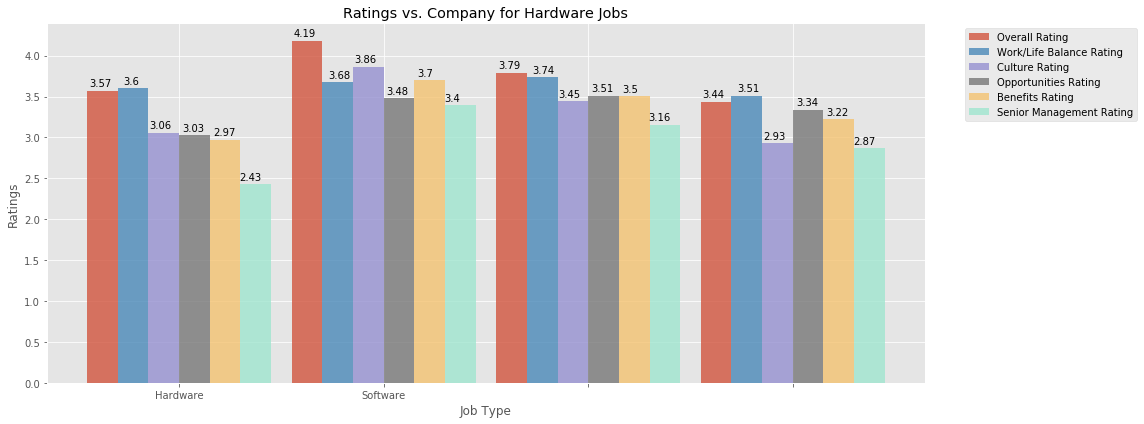

In [261]:
hardware_all=[ratings_overall_hw,ratings_worklife_hw, ratings_culture_hw, ratings_opportunities_hw, ratings_benefits_hw, ratings_management_hw ]
values=[-0.065, 0.05, 0.103, 0.05, 0.23, 0.05, 0.39, 0.05, 0.54, 0.05, 0.67, 0.05]

hvs.HvSCompany("Hardware", values, hardware_all, 4, 16, "Ratings vs. Company for Hardware Jobs")

# Bar chart for different kinds of ratings for 4 software companies
Apple, Google, Amazon, Microsoft

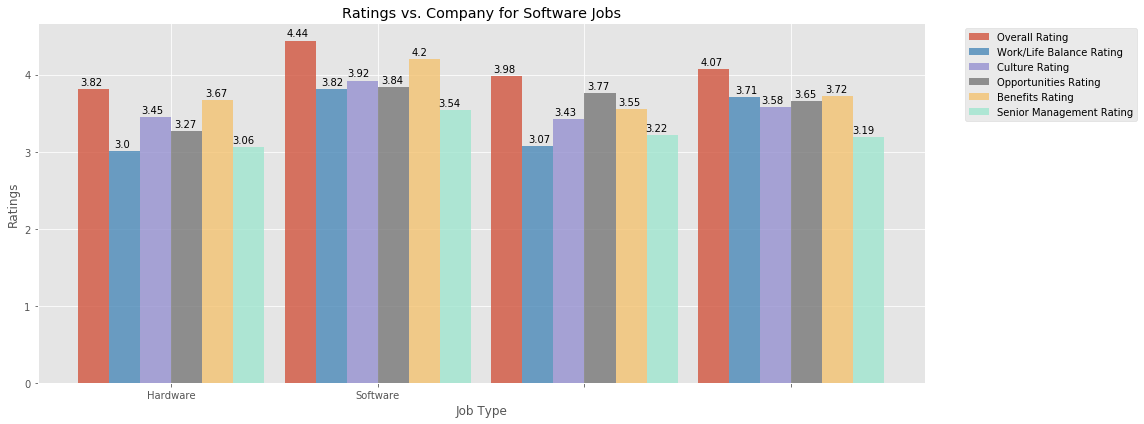

In [262]:
software_all=[ratings_overall_sw_4,ratings_worklife_sw_4, ratings_culture_sw_4, ratings_opportunities_sw_4, ratings_benefits_sw_4, ratings_management_sw_4 ]
values=[-0.065, 0.05, 0.103, 0.05, 0.23, 0.05, 0.39, 0.05, 0.54, 0.05, 0.67, 0.05]

hvs.HvSCompany("Software", values, software_all, 4, 16, "Ratings vs. Company for Software Jobs")


# Hardware vs Software for Intel


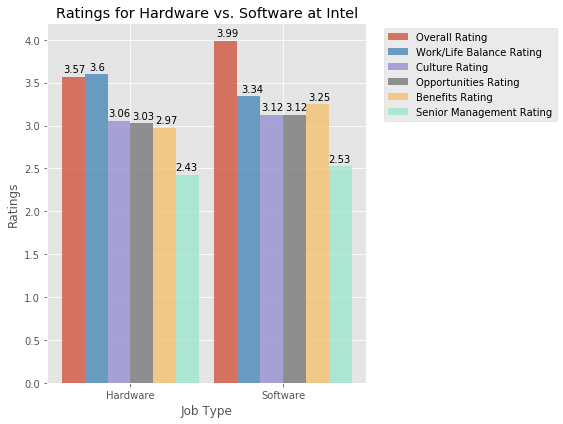

In [263]:
intel_both_overall=(overall_intel_hw, overall_intel_sw)
intel_both_worklife=(worklife_intel_hw, worklife_intel_sw)
intel_both_culture=(culture_intel_hw, culture_intel_sw)
intel_both_opportunities=(opportunities_intel_hw, opportunities_intel_sw)
intel_both_benefits=(benefits_intel_hw, benefits_intel_sw)
intel_both_management=(management_intel_hw, management_intel_sw)

intel_both=[intel_both_overall, intel_both_worklife, intel_both_culture,intel_both_opportunities, intel_both_benefits, intel_both_management ]
values=[-0.065, 0.05, 0.103, 0.05, 0.23, 0.05, 0.39, 0.05, 0.54, 0.05, 0.67, 0.05]

hvs.HvSCompany("Intel", values, intel_both, 2, 8, "Ratings for Hardware vs. Software at Intel")

# Hardware vs. Software at Cisco

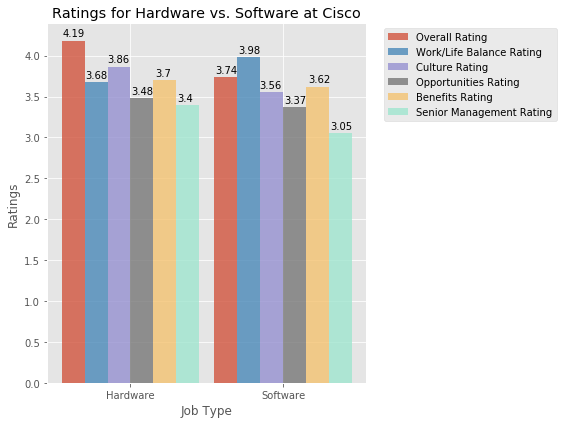

In [264]:
cisco_both_overall=(overall_cisco_hw, overall_cisco_sw)
cisco_both_worklife=(worklife_cisco_hw, worklife_cisco_sw)
cisco_both_culture=(culture_cisco_hw, culture_cisco_sw)
cisco_both_opportunities=(opportunities_cisco_hw, opportunities_cisco_sw)
cisco_both_benefits=(benefits_cisco_hw, benefits_cisco_sw)
cisco_both_management=(management_cisco_hw, management_cisco_sw)

cisco_both=[cisco_both_overall, cisco_both_worklife, cisco_both_culture,cisco_both_opportunities, cisco_both_benefits, cisco_both_management ]
values=[-0.07, 0.05, 0.08, 0.05, 0.22, 0.05, 0.38, 0.05, 0.54, 0.05, 0.68, 0.05]

hvs.HvSCompany("Cisco", values, cisco_both, 2, 8, "Ratings for Hardware vs. Software at Cisco")


# Hardware vs. Software at Northrop Grumman

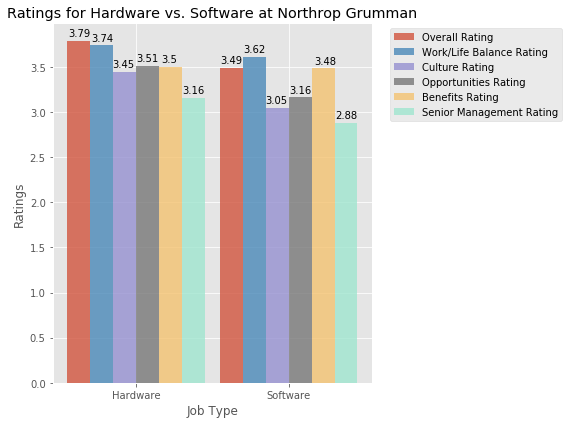

In [265]:
ng_both_overall=(overall_northrop_hw, overall_northrop_sw)
ng_both_worklife=(worklife_northrop_hw, worklife_northrop_sw)
ng_both_culture=(culture_northrop_hw, culture_northrop_sw)
ng_both_opportunities=(opportunities_northrop_hw, opportunities_northrop_sw)
ng_both_benefits=(benefits_northrop_hw, benefits_northrop_sw)
ng_both_management=(management_northrop_hw, management_northrop_sw)

northrop_both=[ng_both_overall, ng_both_worklife, ng_both_culture,ng_both_opportunities, ng_both_benefits, ng_both_management ]
values=[-0.07, 0.05, 0.08, 0.05, 0.22, 0.05, 0.38, 0.05, 0.54, 0.05, 0.68, 0.05]

hvs.HvSCompany("Northrop Grumman", values, northrop_both, 2, 8, "Ratings for Hardware vs. Software at Northrop Grumman")


# Hardware vs. Software at General Electric

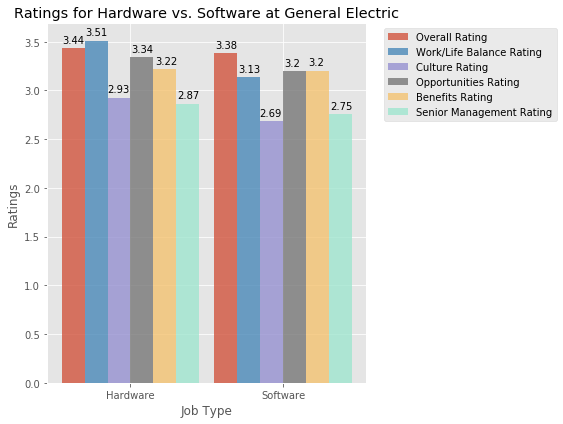

In [266]:
ge_both_overall=(overall_ge_hw, overall_ge_sw)
ge_both_worklife=(worklife_ge_hw, worklife_ge_sw)
ge_both_culture=(culture_ge_hw, culture_ge_sw)
ge_both_opportunities=(opportunities_ge_hw, opportunities_ge_sw)
ge_both_benefits=(benefits_ge_hw, benefits_ge_sw)
ge_both_management=(management_ge_hw, management_ge_sw)

ge_both=[ge_both_overall, ge_both_worklife, ge_both_culture,ge_both_opportunities, ge_both_benefits, ge_both_management ]
values=[-0.07, 0.05, 0.08, 0.05, 0.22, 0.05, 0.38, 0.05, 0.54, 0.05, 0.68, 0.05]

hvs.HvSCompany("General Electric", values, ge_both, 2, 8, "Ratings for Hardware vs. Software at General Electric")

# Average Ratings for Software vs. Hardware

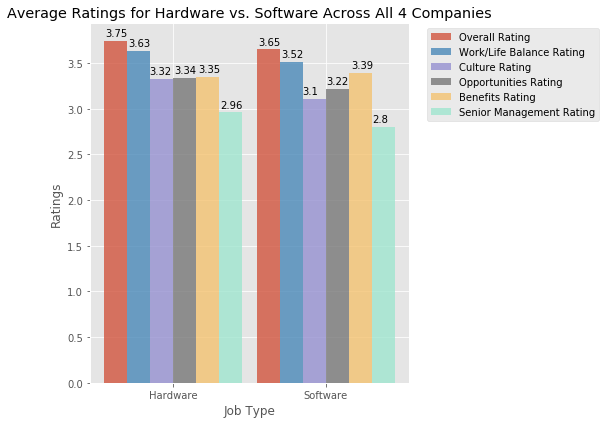

In [267]:
# Overall Ratings for Hardware vs. Software at 4 companies
overall_sw=(overall_ge_sw+overall_northrop_sw+overall_intel_sw+overall_cisco_sw)/4
worklife_sw=(worklife_ge_sw+worklife_northrop_sw+worklife_intel_sw+worklife_cisco_sw)/4
culture_sw=(culture_ge_sw+culture_northrop_sw+culture_intel_sw+culture_cisco_sw)/4
opportunities_sw=(opportunities_ge_sw+opportunities_northrop_sw+opportunities_intel_sw+opportunities_cisco_sw)/4
benefits_sw=(benefits_ge_sw+benefits_northrop_sw+benefits_intel_sw+benefits_cisco_sw)/4
management_sw=(management_ge_sw+management_northrop_sw+management_intel_sw+management_cisco_sw)/4

overall_hw=(overall_ge_hw+overall_northrop_hw+overall_intel_hw+overall_cisco_hw)/4
worklife_hw=(worklife_ge_hw+worklife_northrop_hw+worklife_intel_hw+worklife_cisco_hw)/4
culture_hw=(culture_ge_hw+culture_northrop_hw+culture_intel_hw+culture_cisco_hw)/4
opportunities_hw=(opportunities_ge_hw+opportunities_northrop_hw+opportunities_intel_hw+opportunities_cisco_hw)/4
benefits_hw=(benefits_ge_hw+benefits_northrop_hw+benefits_intel_hw+benefits_cisco_hw)/4
management_hw=(management_ge_hw+management_northrop_hw+management_intel_hw+management_cisco_hw)/4

all_overall=(overall_hw, overall_sw)
all_worklife=(worklife_hw, worklife_sw)
all_culture=(culture_hw, culture_sw)
all_opportunities=(opportunities_hw, opportunities_sw)
all_benefits=(benefits_hw, benefits_sw)
all_management=(management_hw, management_sw)


all_both=[all_overall, all_worklife, all_culture, all_opportunities, all_benefits, all_management ]
values=[-0.07, 0.05, 0.08, 0.05, 0.22, 0.05, 0.38, 0.05, 0.54, 0.05, 0.68, 0.05]

hvs.HvSCompany("GE", values, all_both, 2, 8, "Average Ratings for Hardware vs. Software Across All 4 Companies")

# Salary Analysis for Software Jobs
Note: You will receive two errors in this section that can be ignored.

In [268]:
salary.salary_data('CA.csv', path_of_datasets)

/Users/ashleyfreeman/Desktop/USE THIS/FINAL SUBMISSION/Salary.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Salary'] = new_df['Salary'].str.replace(r'[^0-9-]+', '')
/Users/ashleyfreeman/Desktop/USE THIS/FINAL SUBMISSION/Salary.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Salary'] = new_df['Salary'].str.split('-')
/Users/ashleyfreeman/Desktop/USE THIS/FINAL SUBMISSION/Salary.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

100335

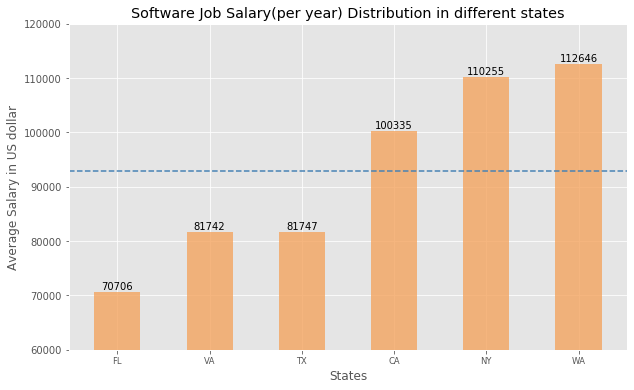

Average salary of the software engineer is: $92905


In [269]:
salary.salary_figure('software', path_of_datasets)

/Users/ashleyfreeman/Desktop/USE THIS/FINAL SUBMISSION/Salary.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Salary'] = new_df['Salary'].str.replace(r'[^0-9-]+', '')
/Users/ashleyfreeman/Desktop/USE THIS/FINAL SUBMISSION/Salary.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Salary'] = new_df['Salary'].str.split('-')
/Users/ashleyfreeman/Desktop/USE THIS/FINAL SUBMISSION/Salary.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

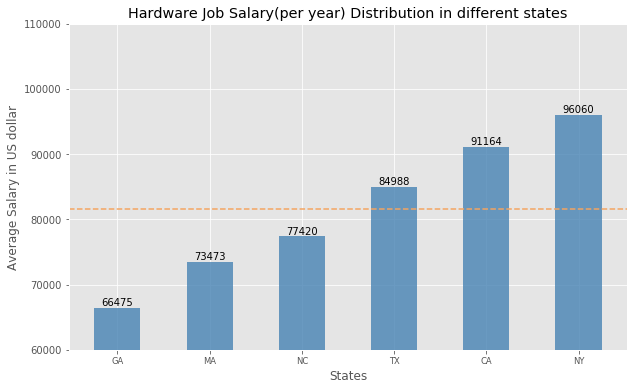

Average salary of the hardware engineer is: $81596


In [270]:
salary.salary_figure('hardware', path_of_datasets)

# Wordclouds
NOTE: Each word cloud takes a couple seconds to generate!

### Intel Pros and Cons

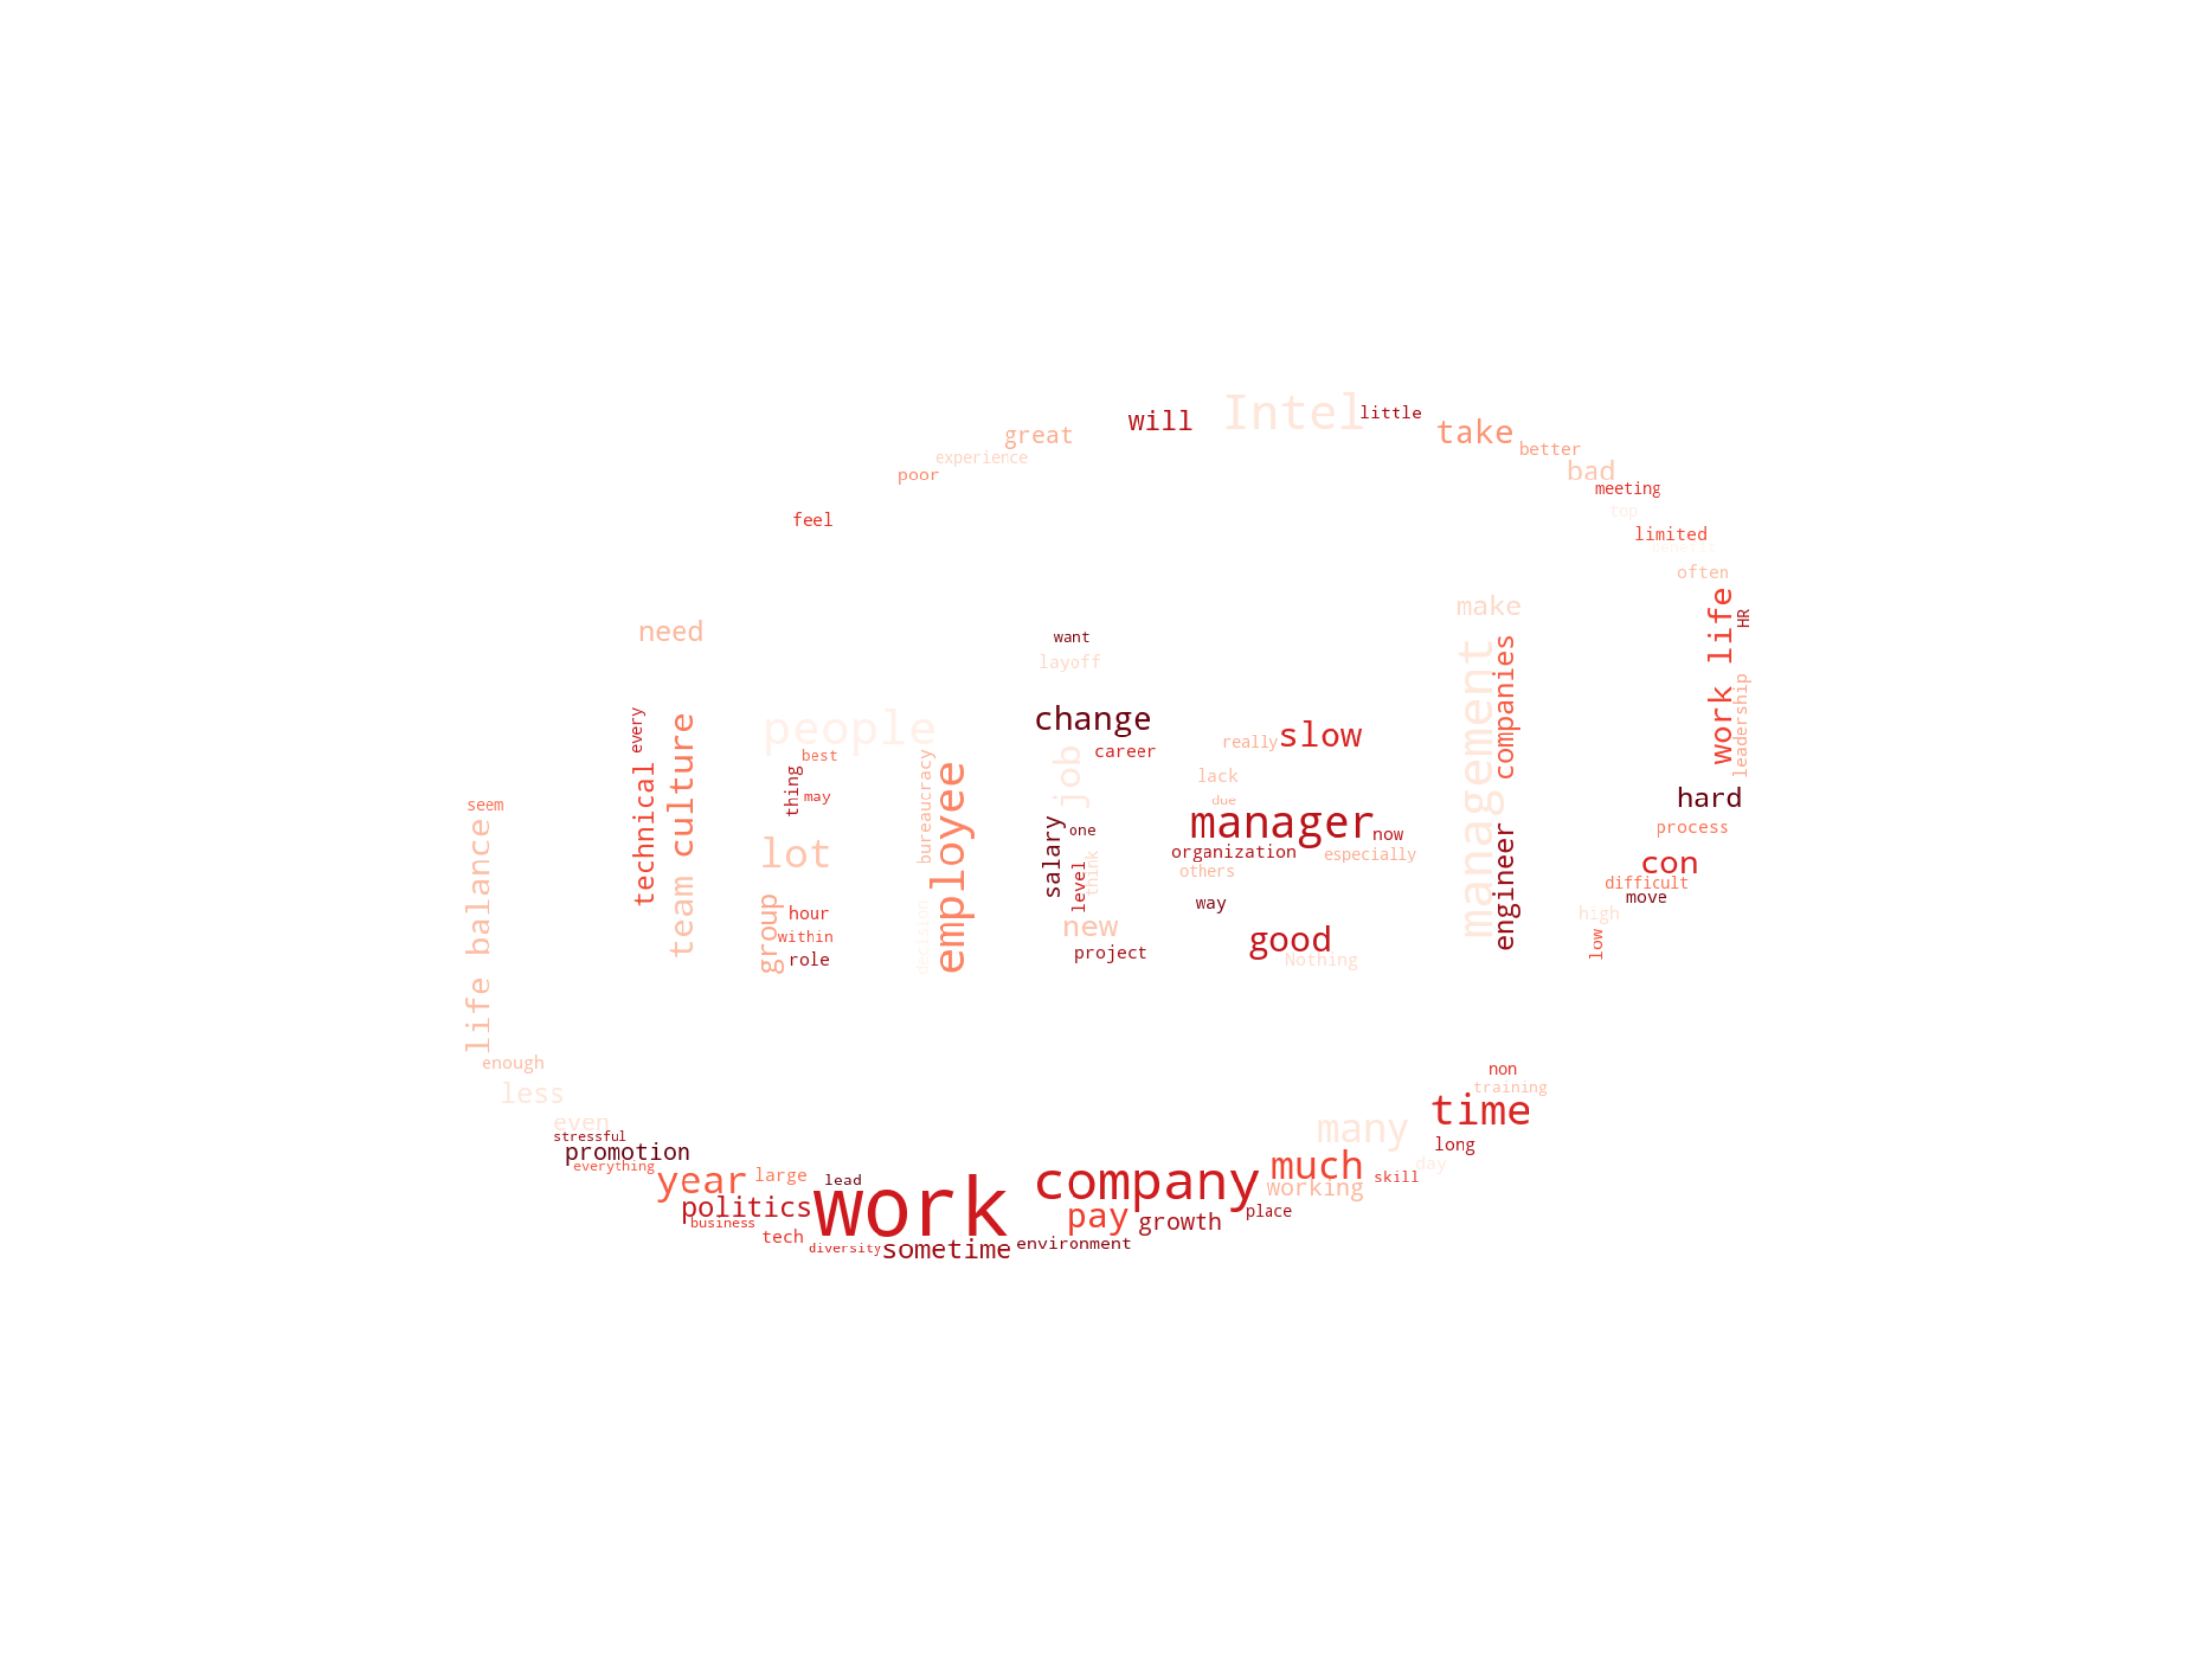

In [271]:
wc.wordCloudFuncBad("Intel", path_of_datasets)

### Apple Pros and Cons

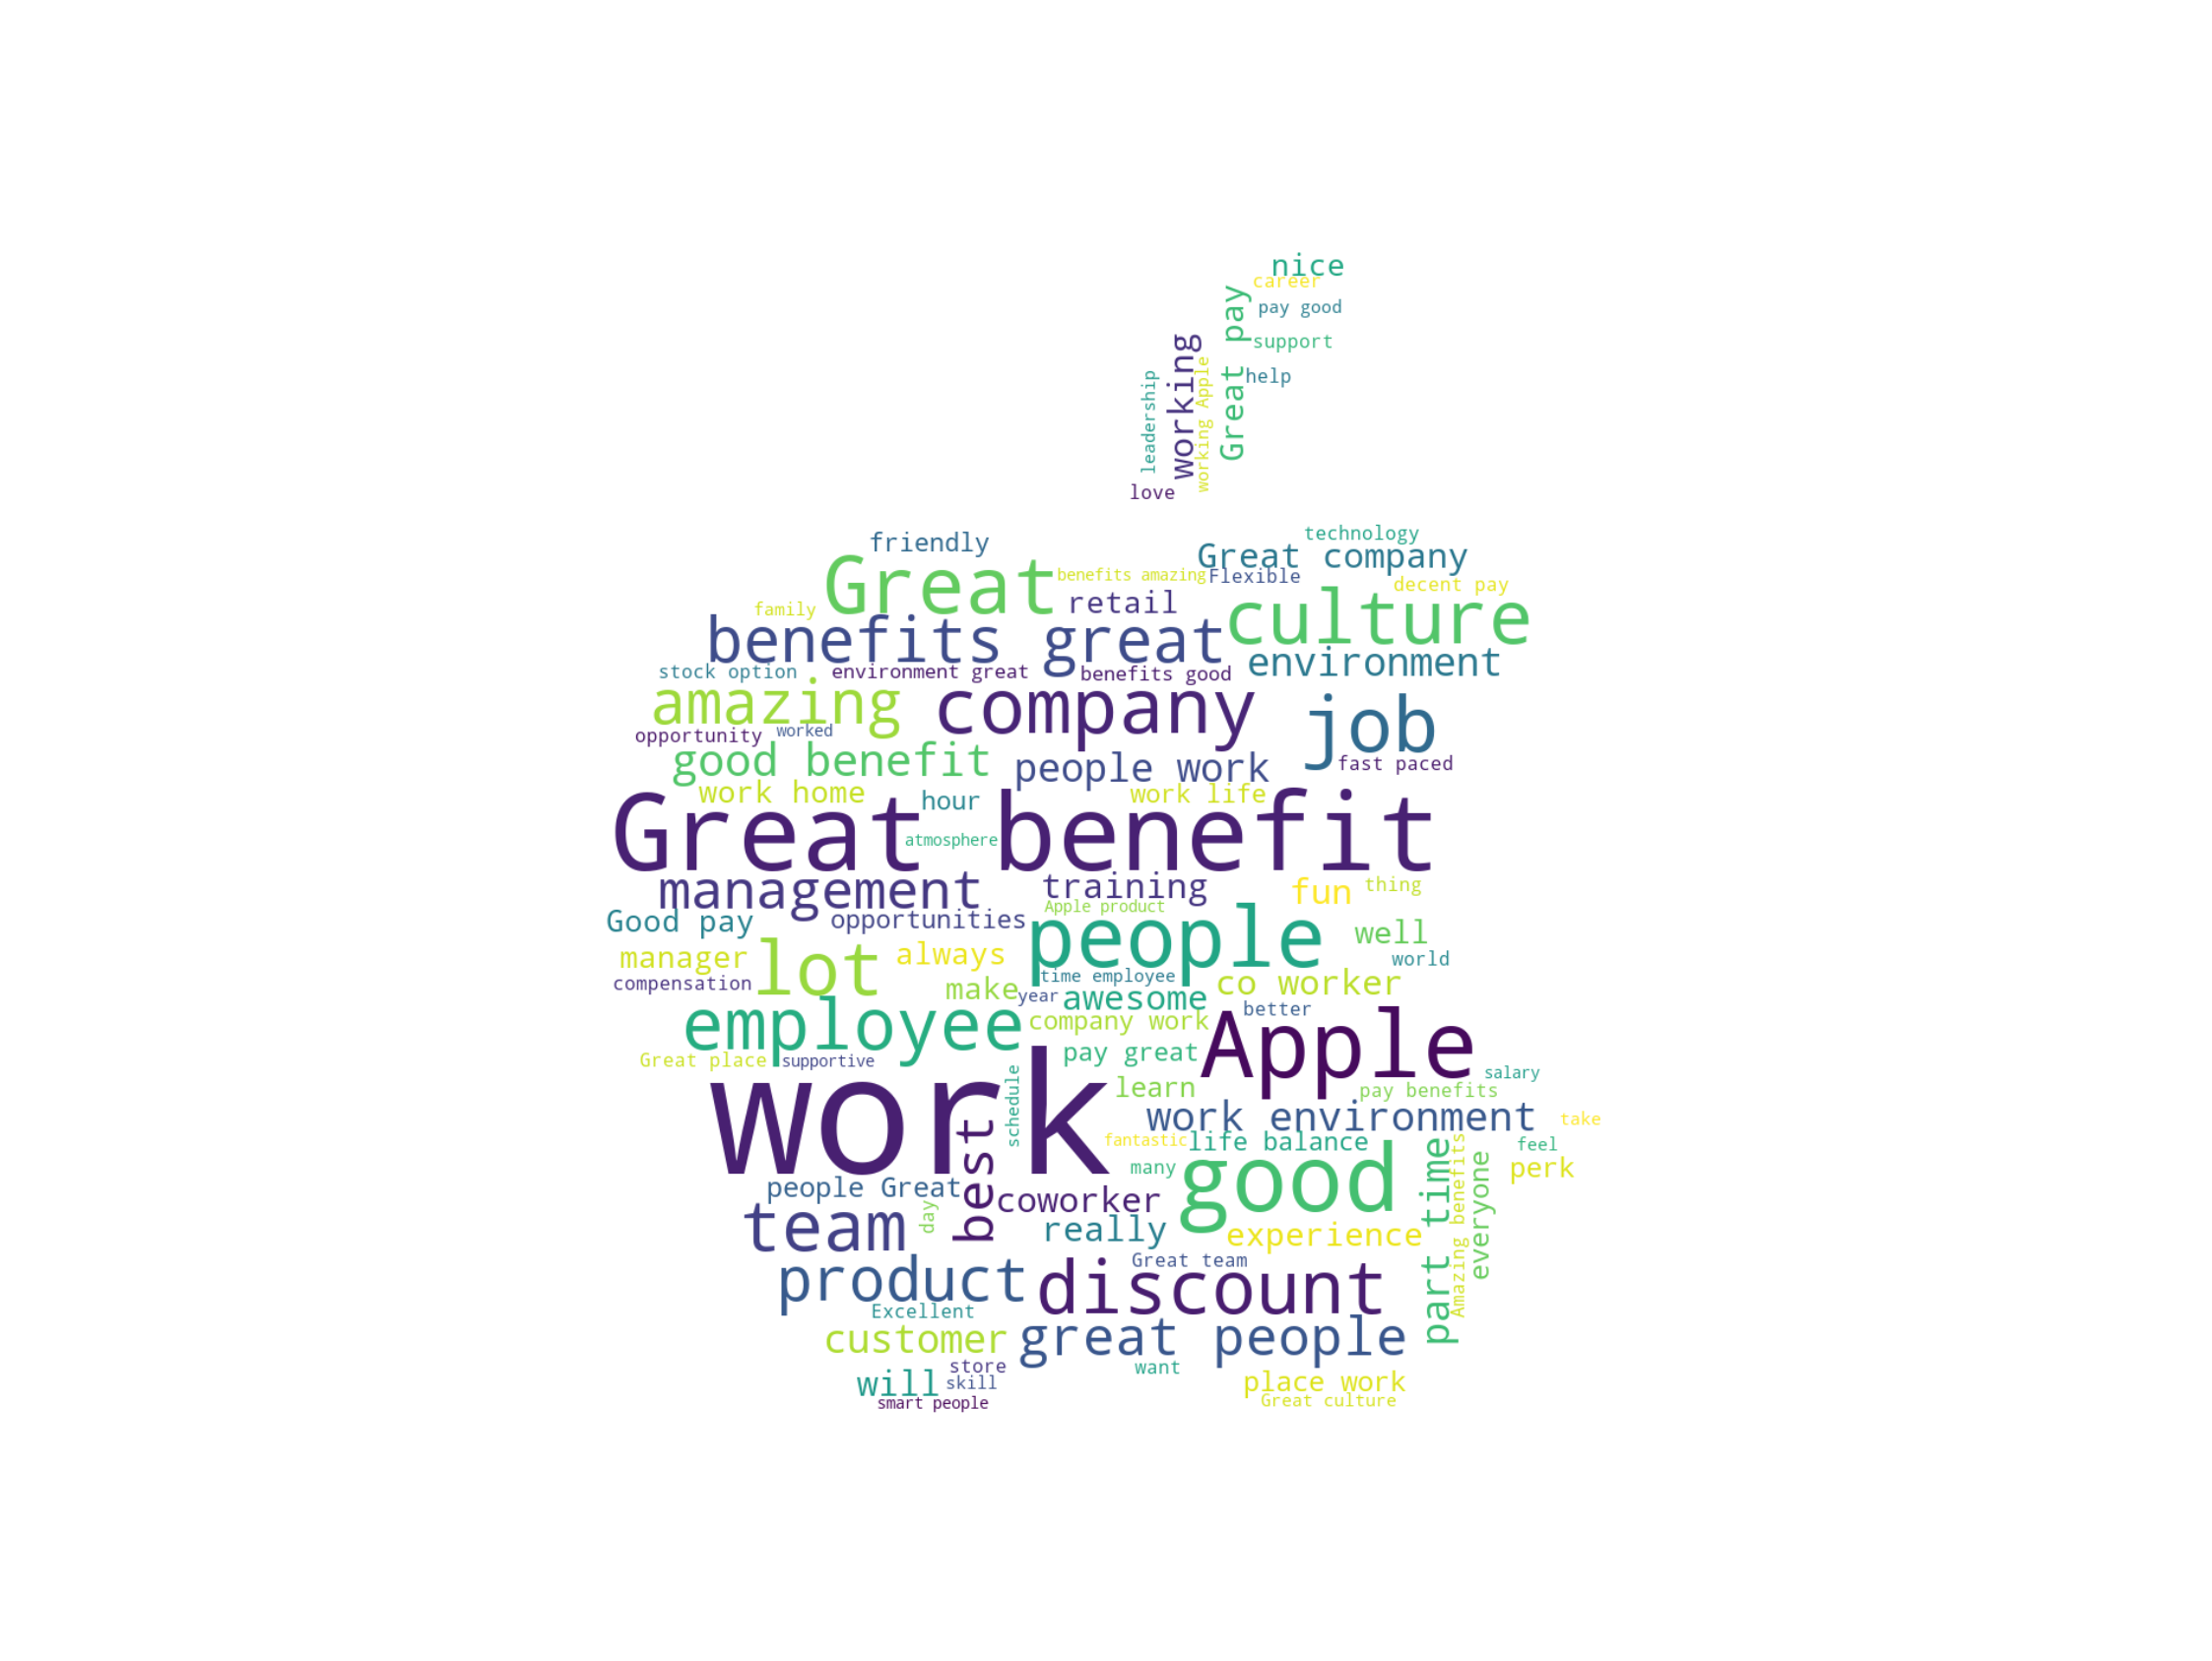

In [272]:
wc.wordCloudFuncGood("apple", path_of_datasets)

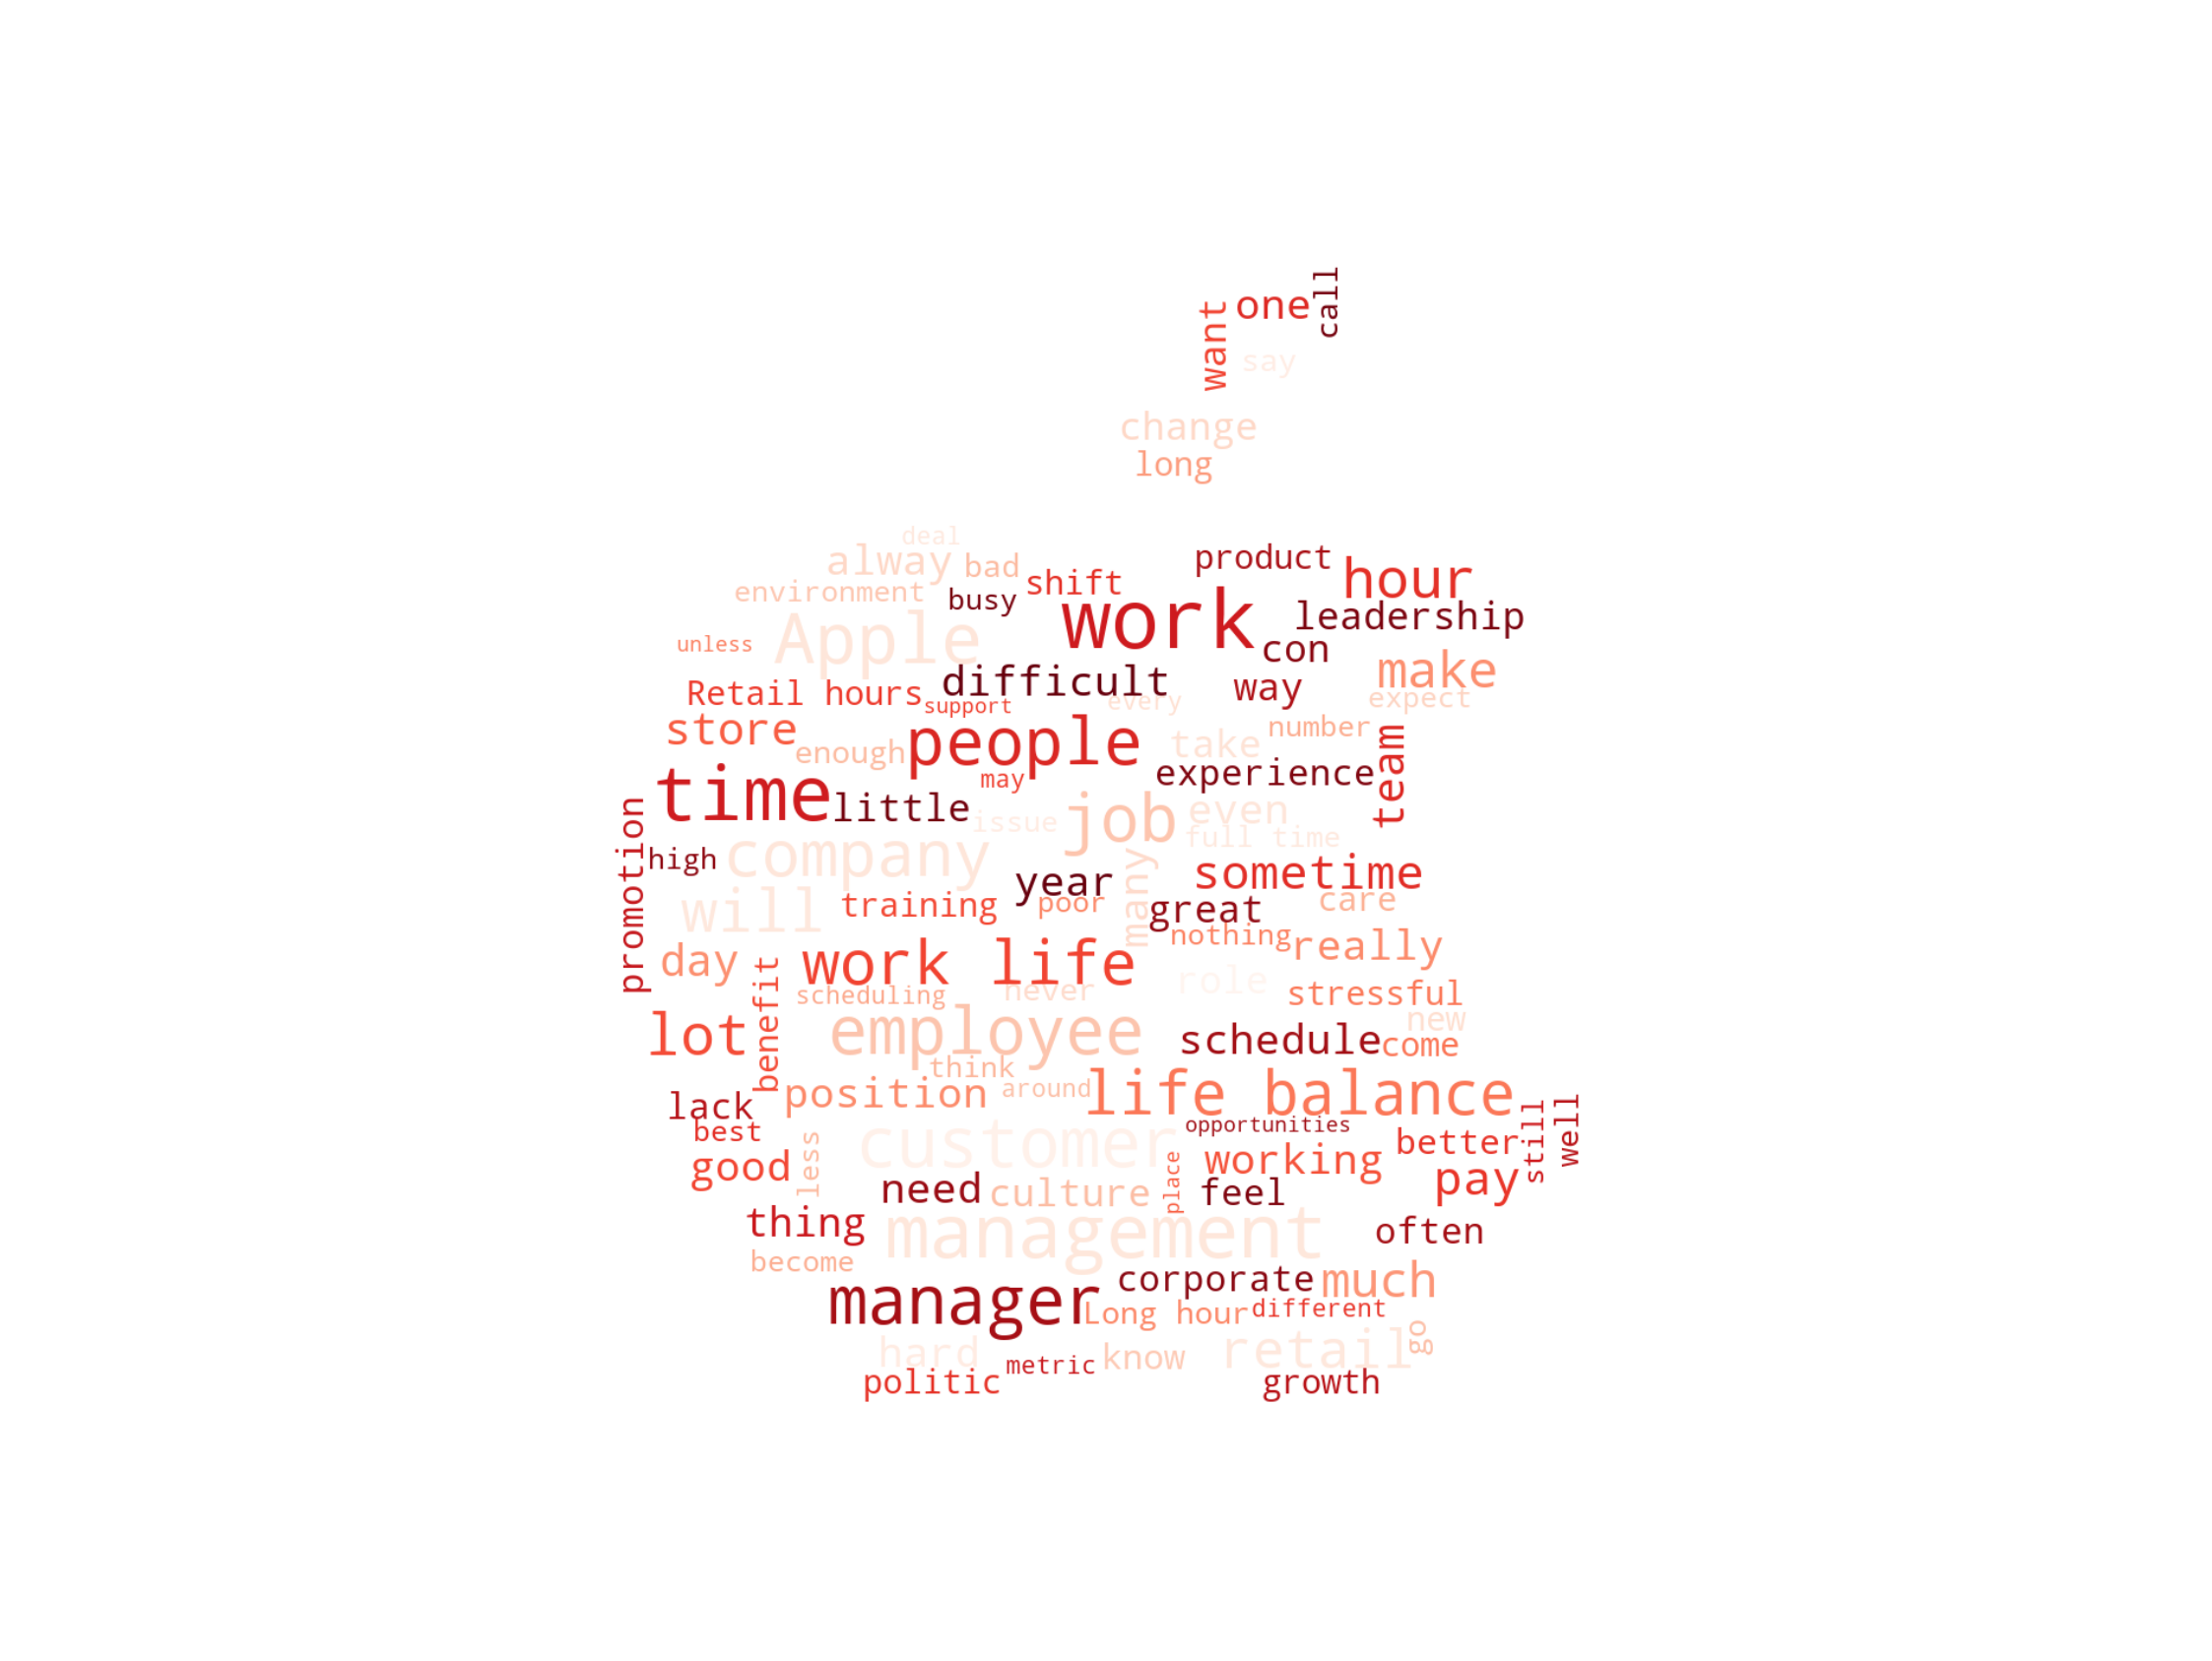

In [273]:
wc.wordCloudFuncBad("apple", path_of_datasets)

### Cisco Pros and Cons

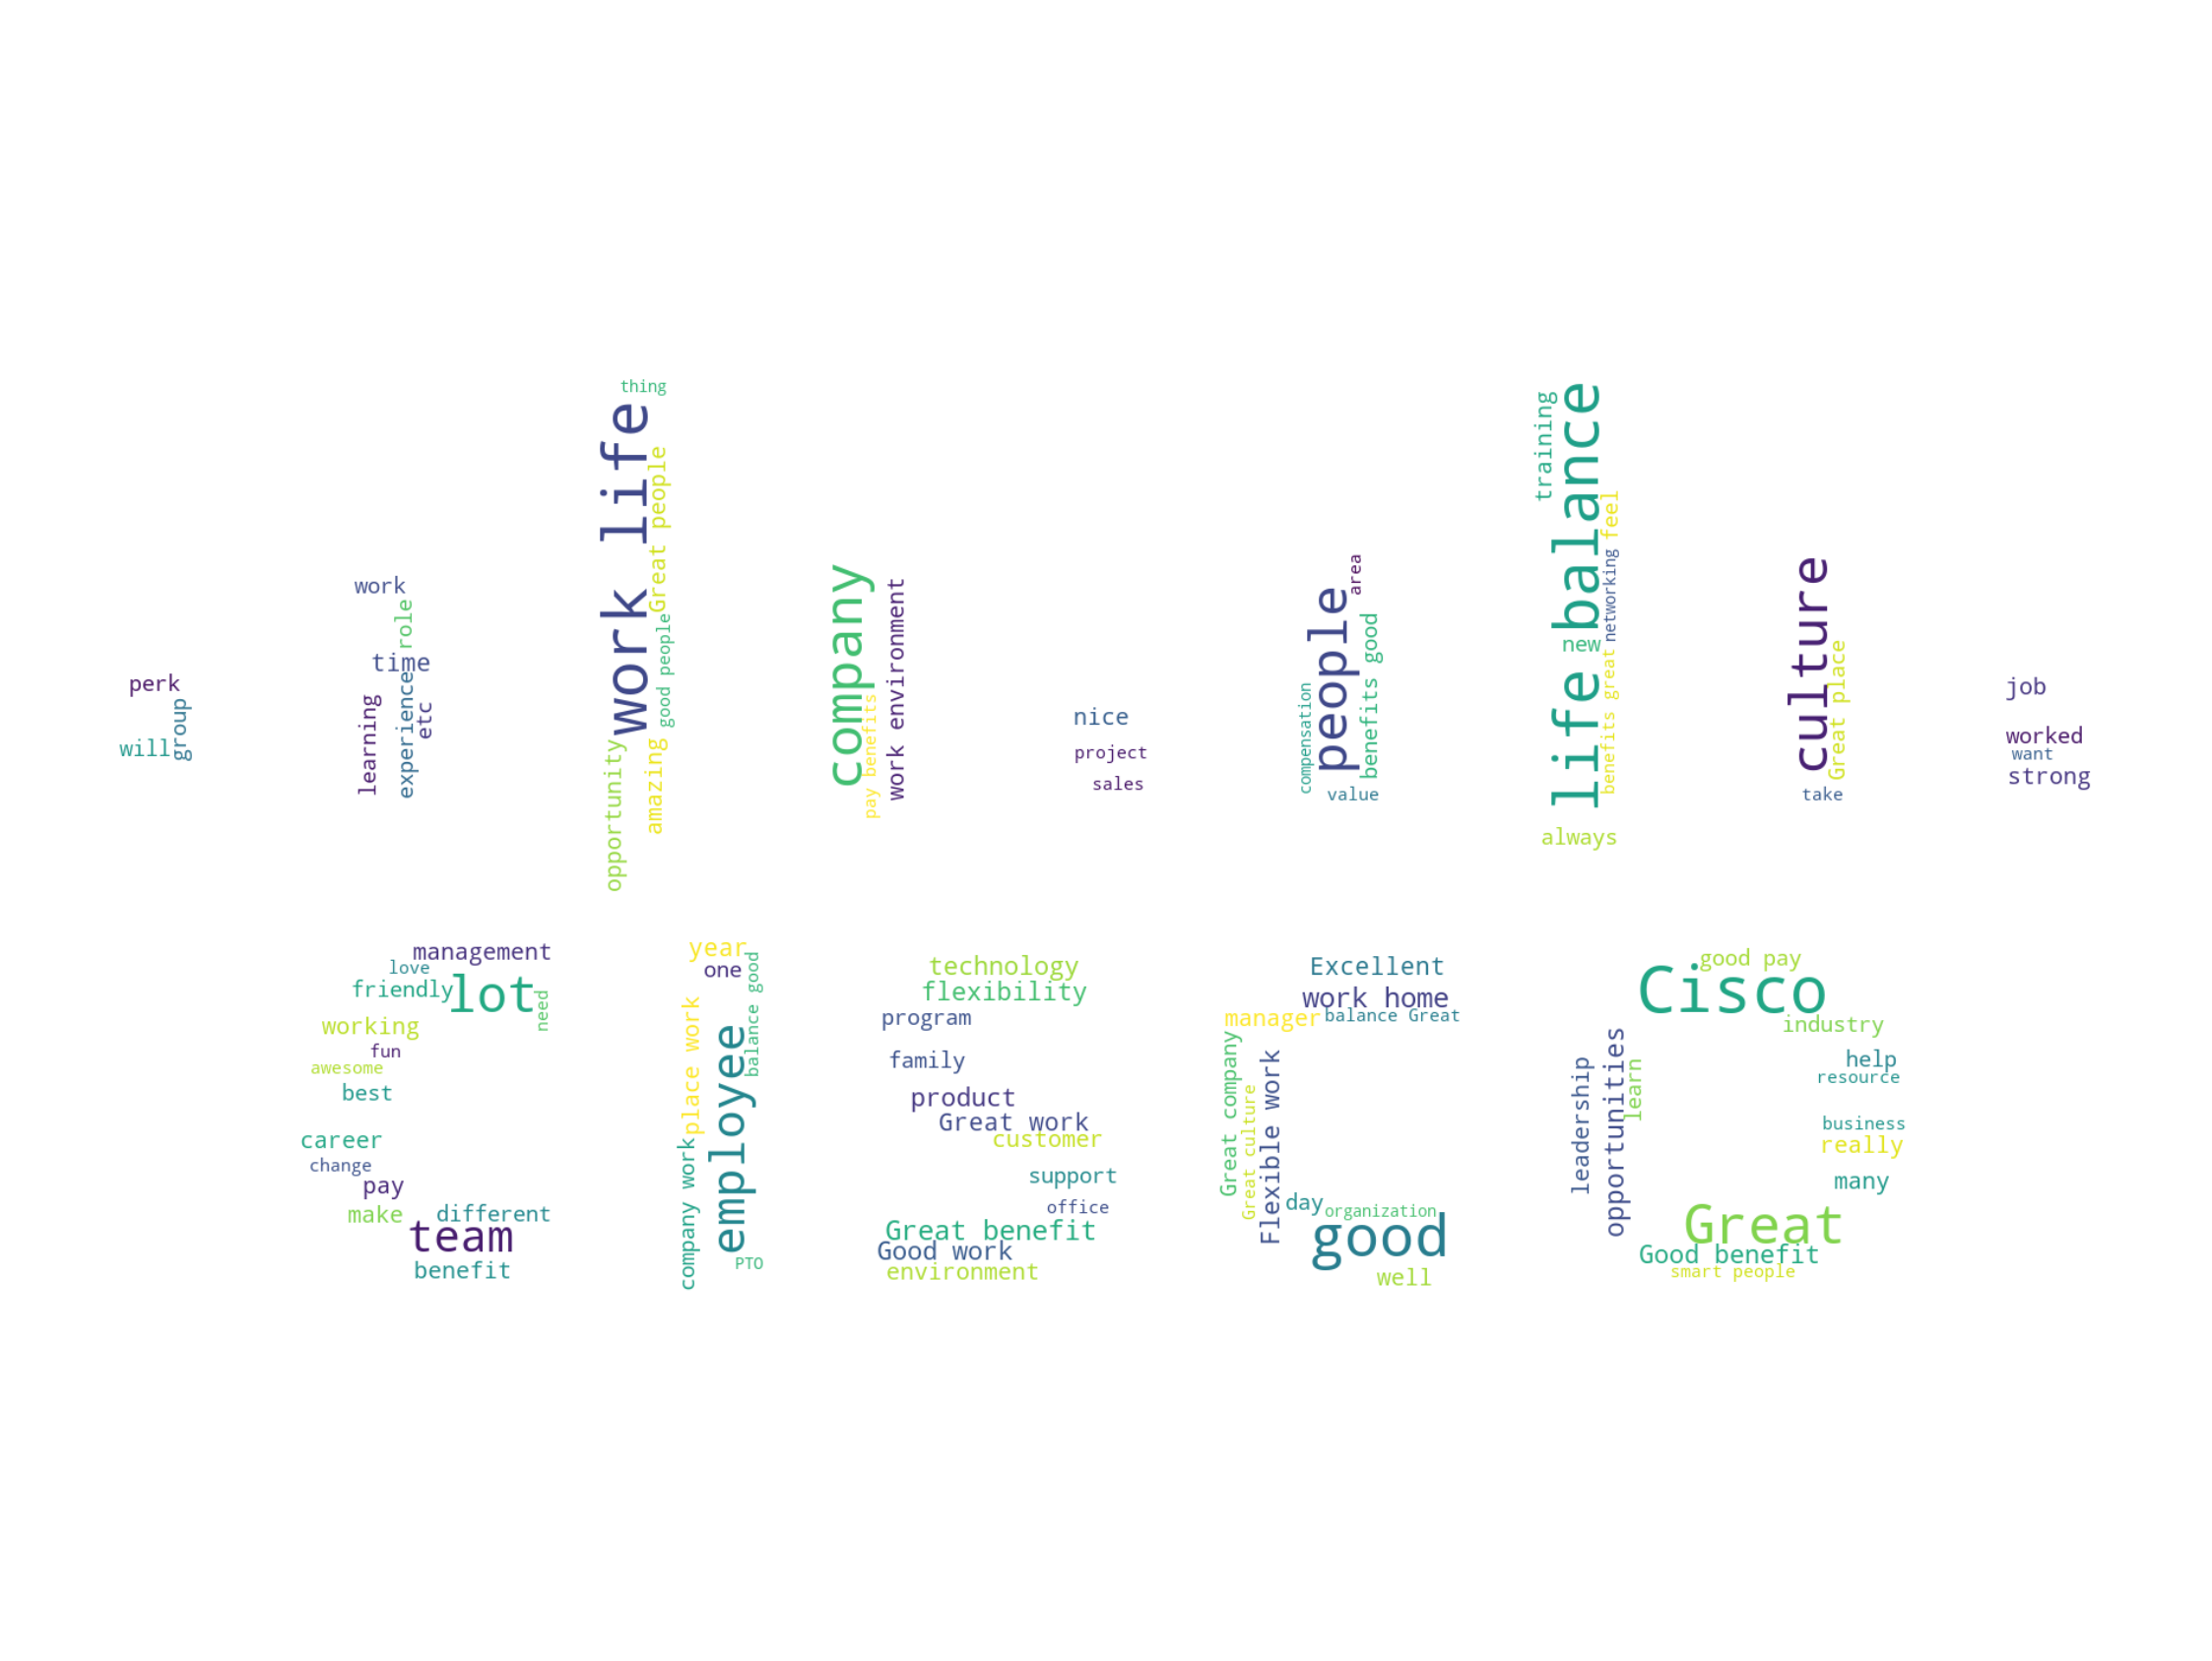

In [274]:
wc.wordCloudFuncGood("cisco", path_of_datasets)

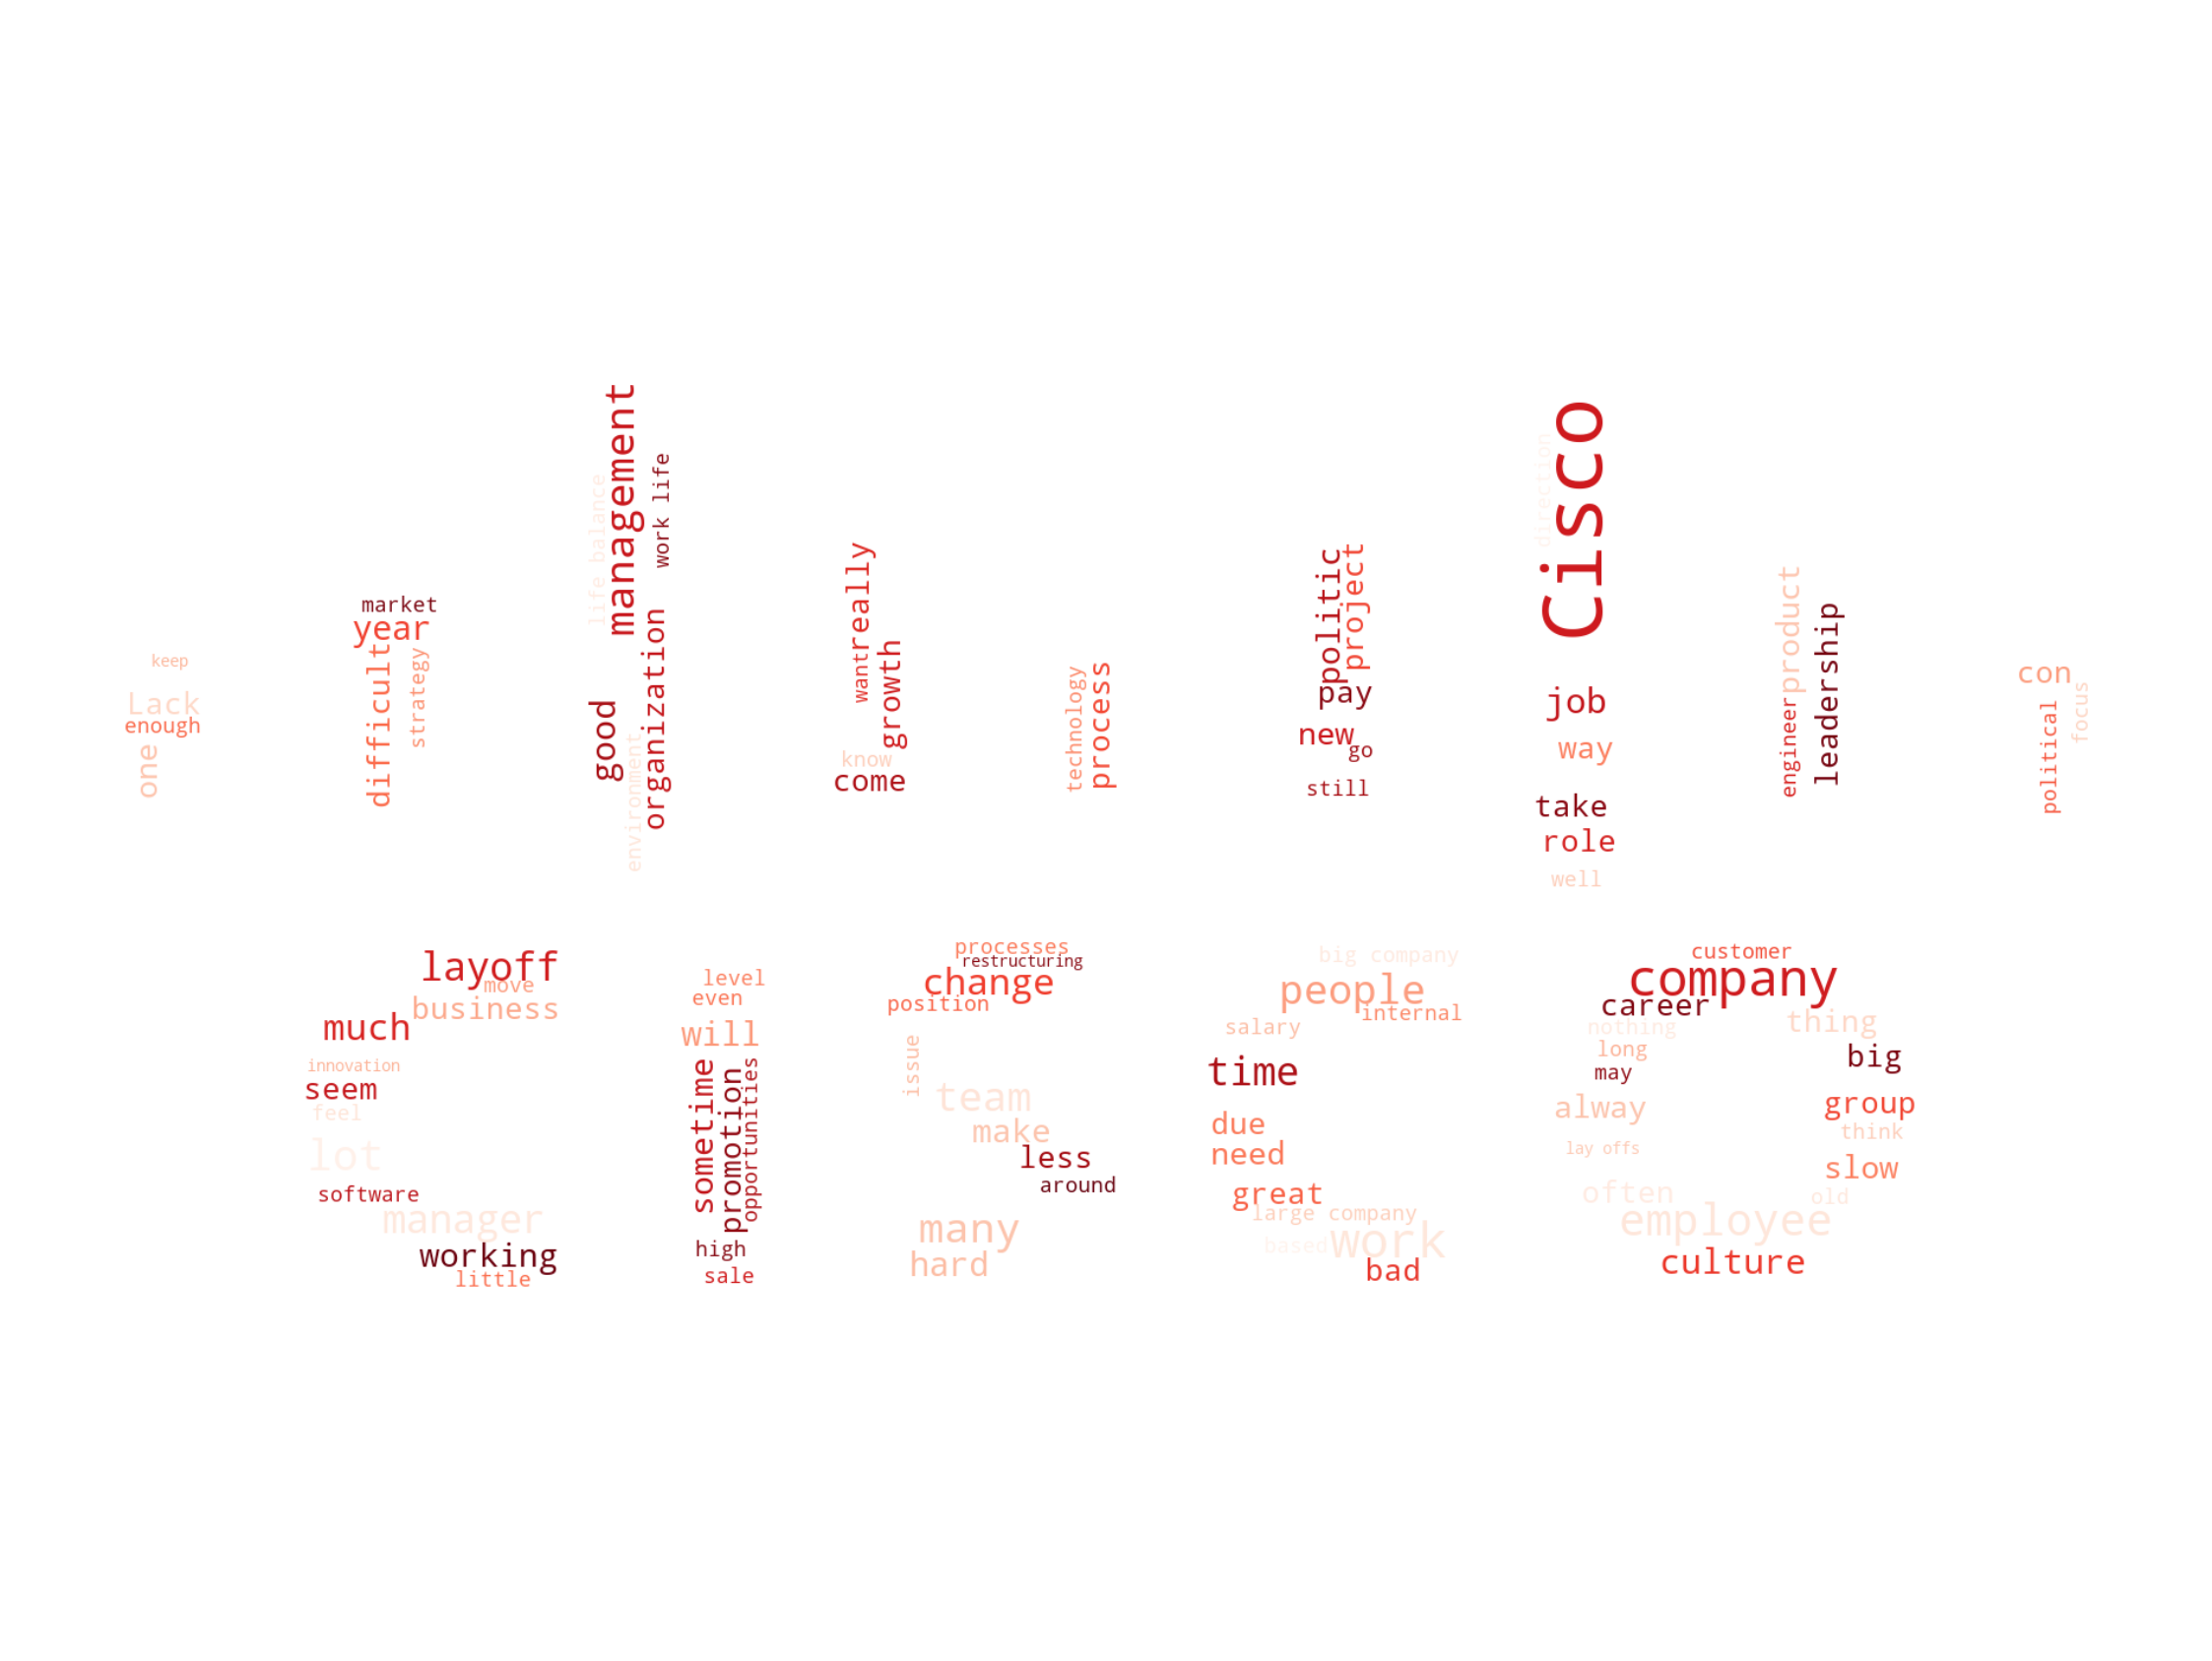

In [275]:
wc.wordCloudFuncBad("cisco", path_of_datasets)

### Google Pros and Cons

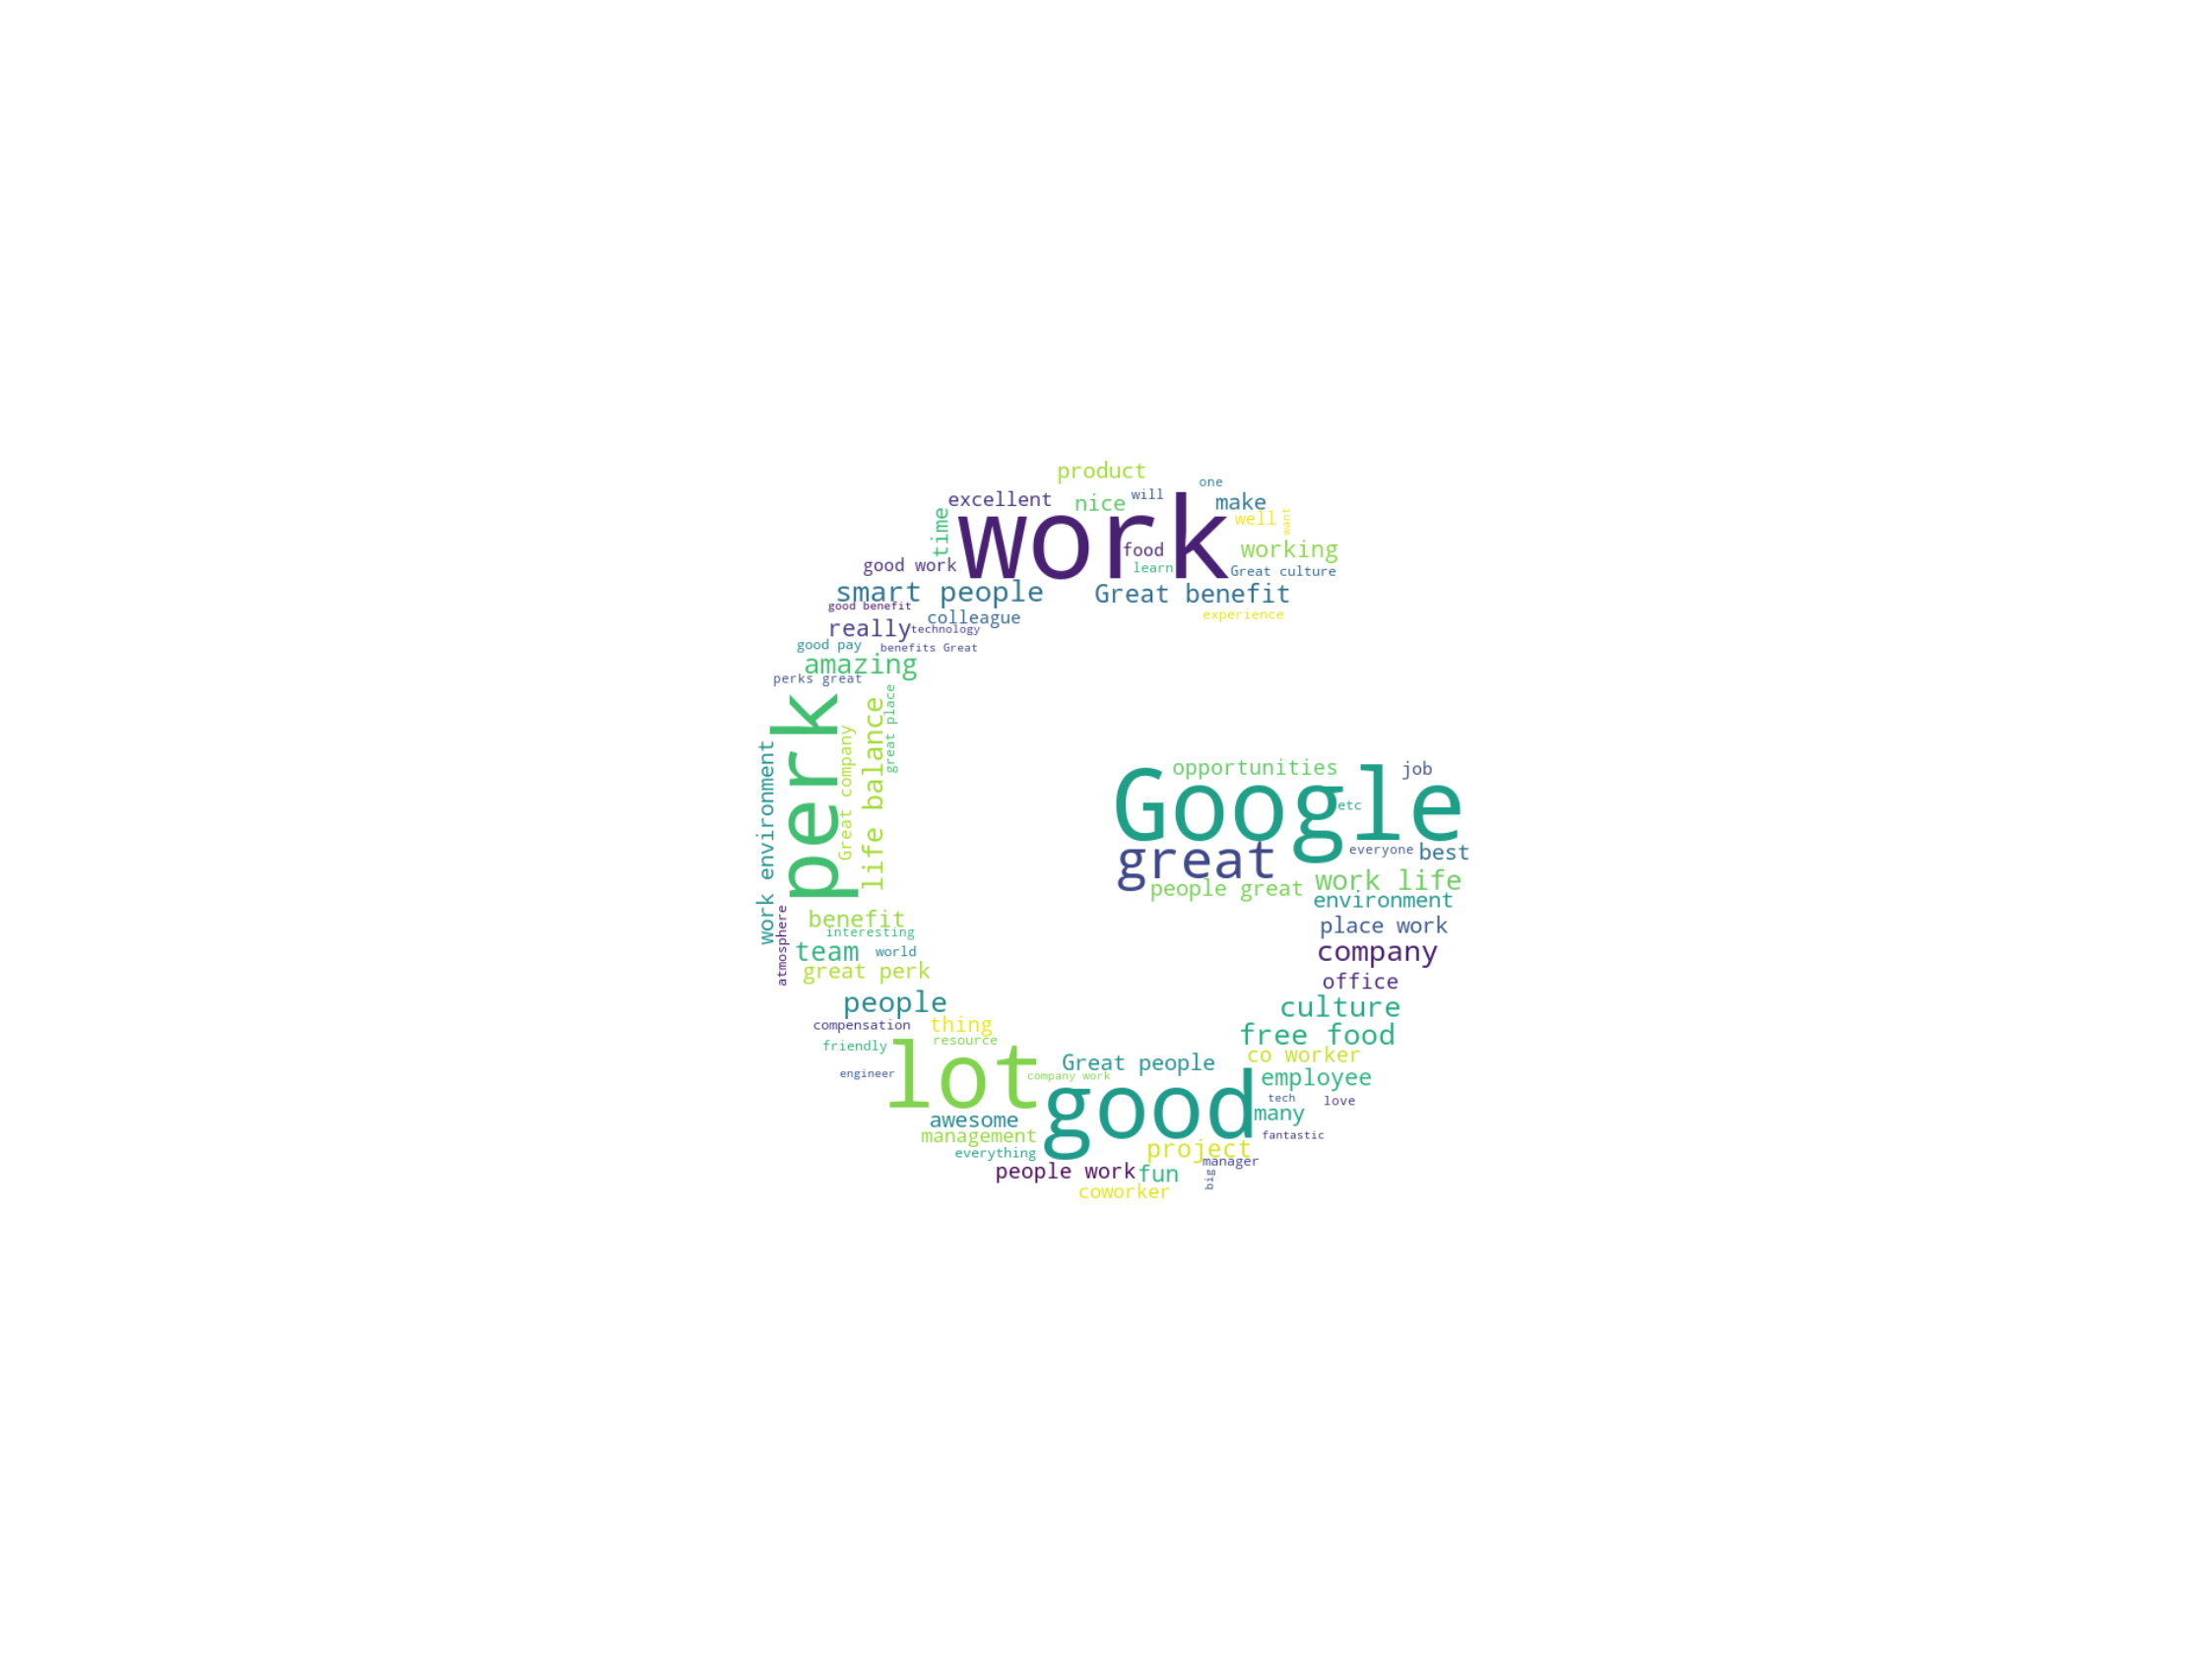

In [276]:
wc.wordCloudFuncGood("google", path_of_datasets)

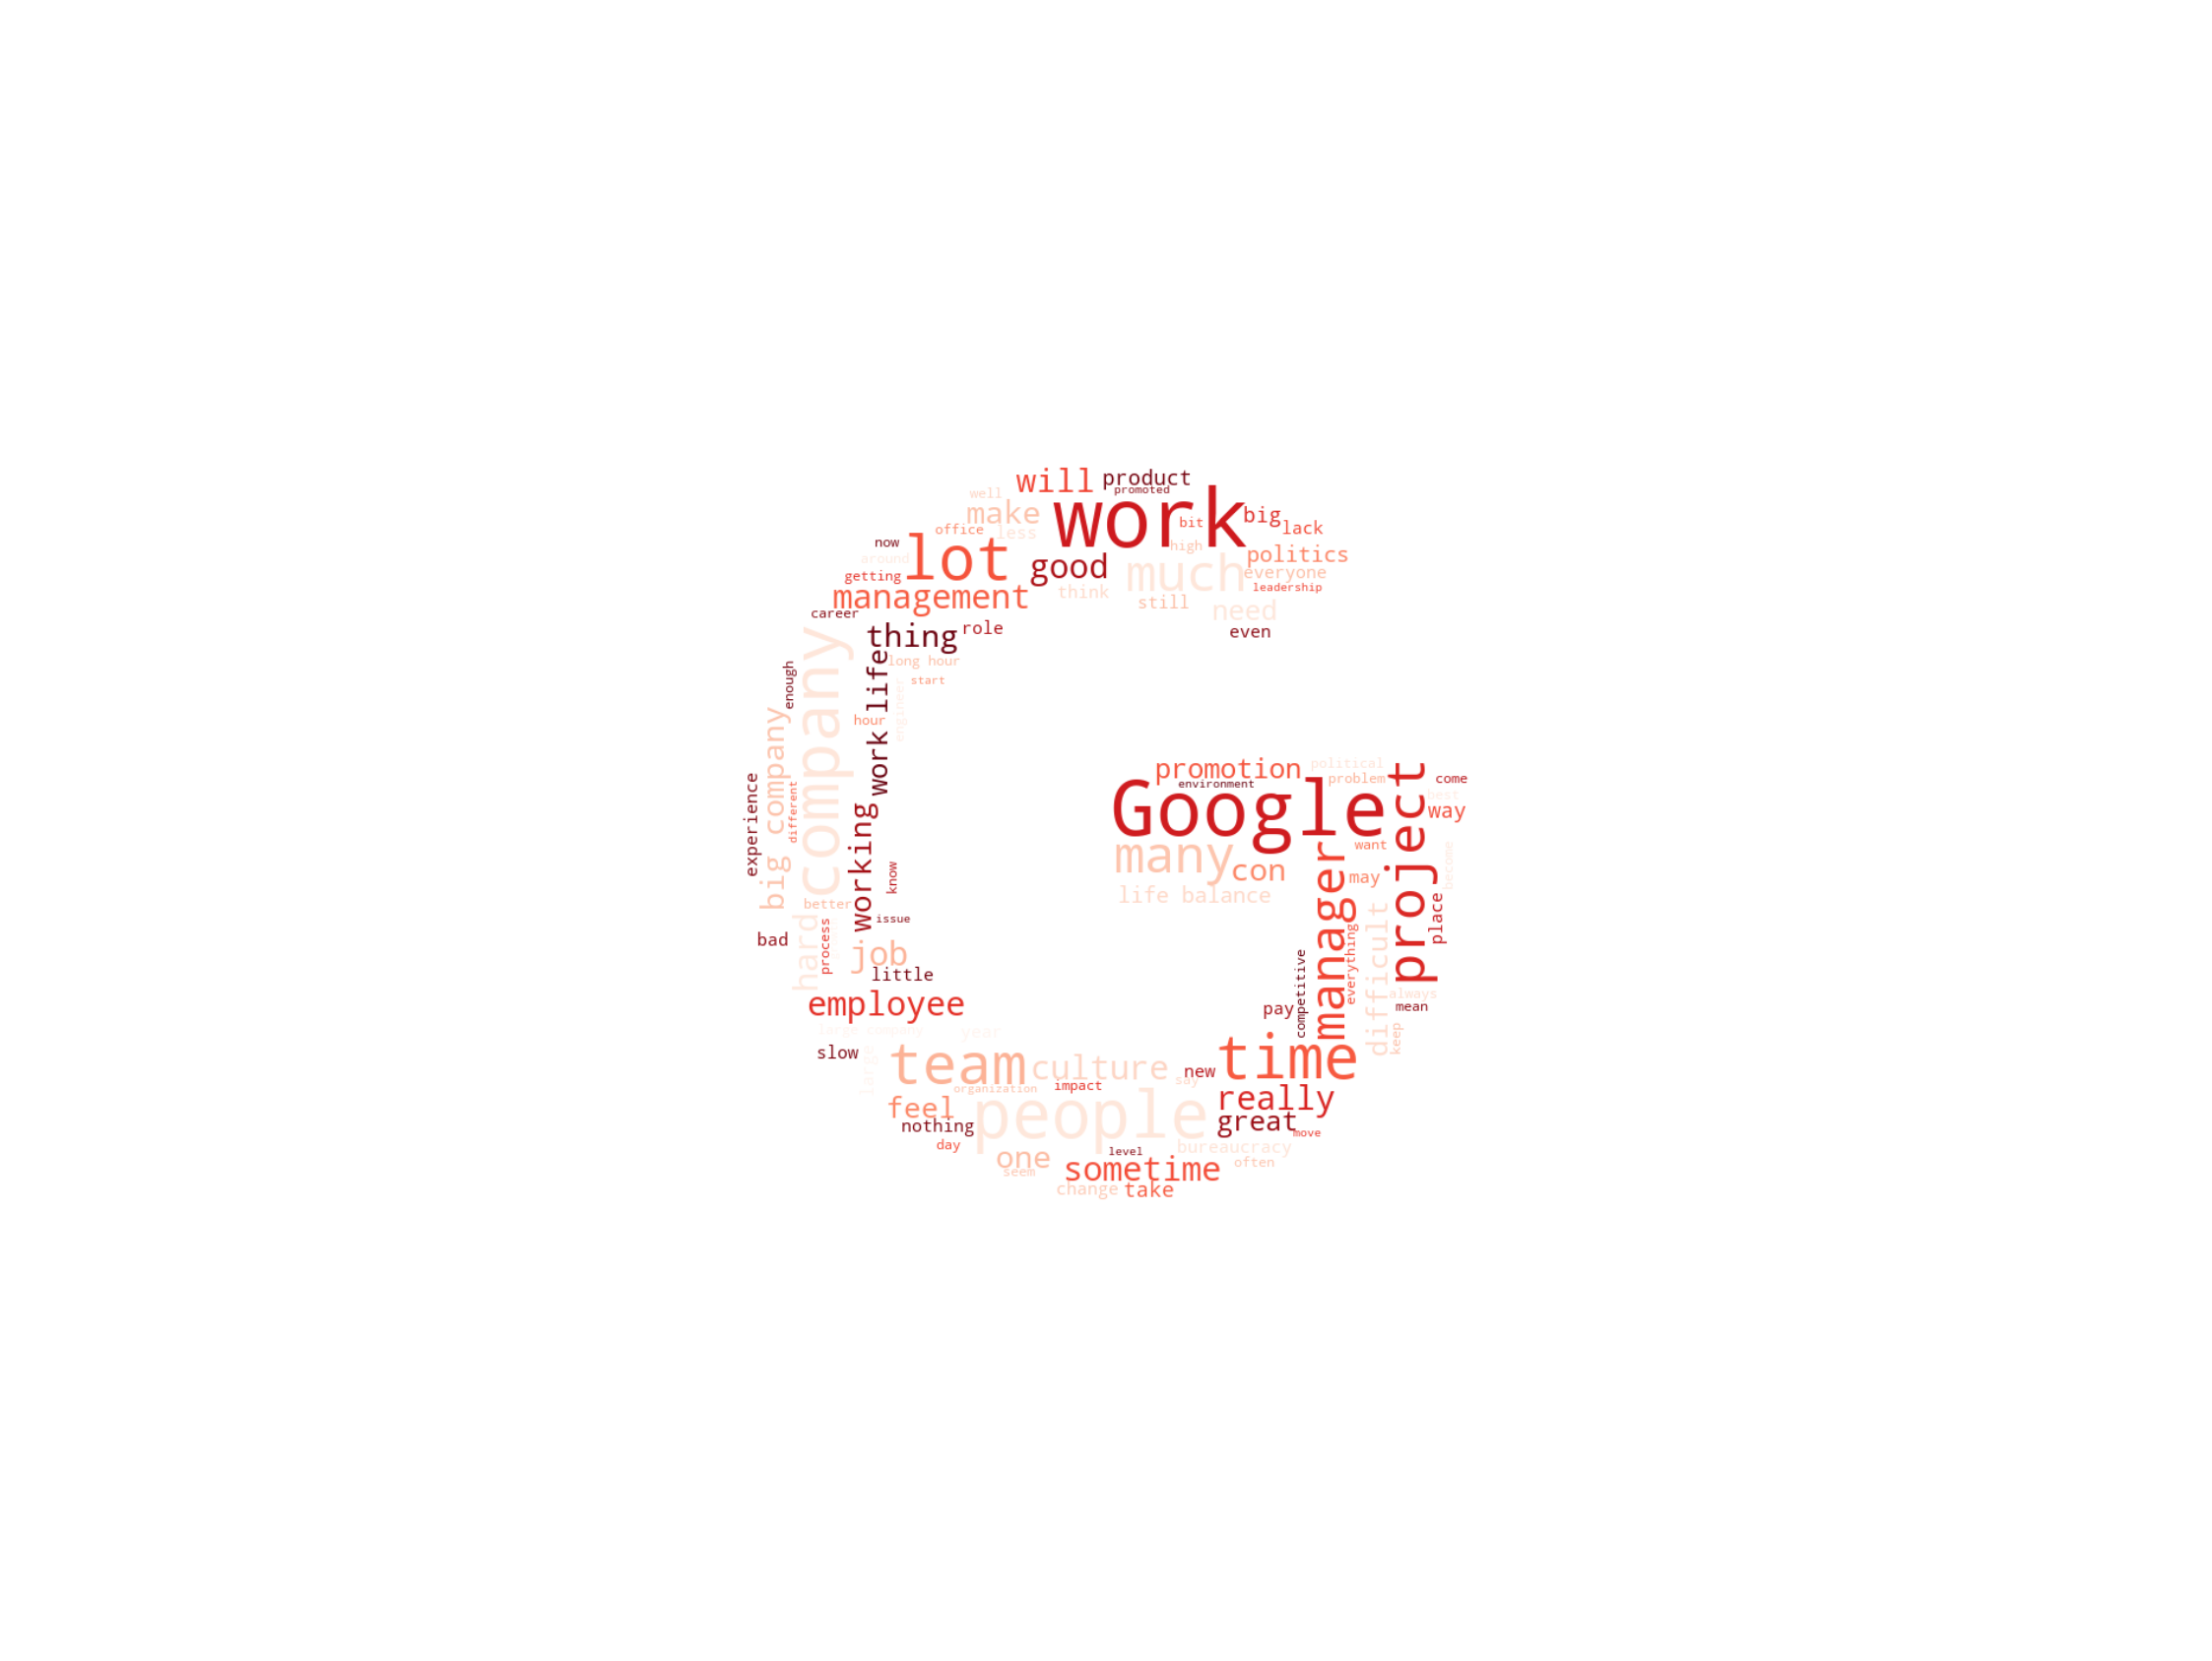

In [277]:
wc.wordCloudFuncBad("google", path_of_datasets)

### General Electric Pros and Cons

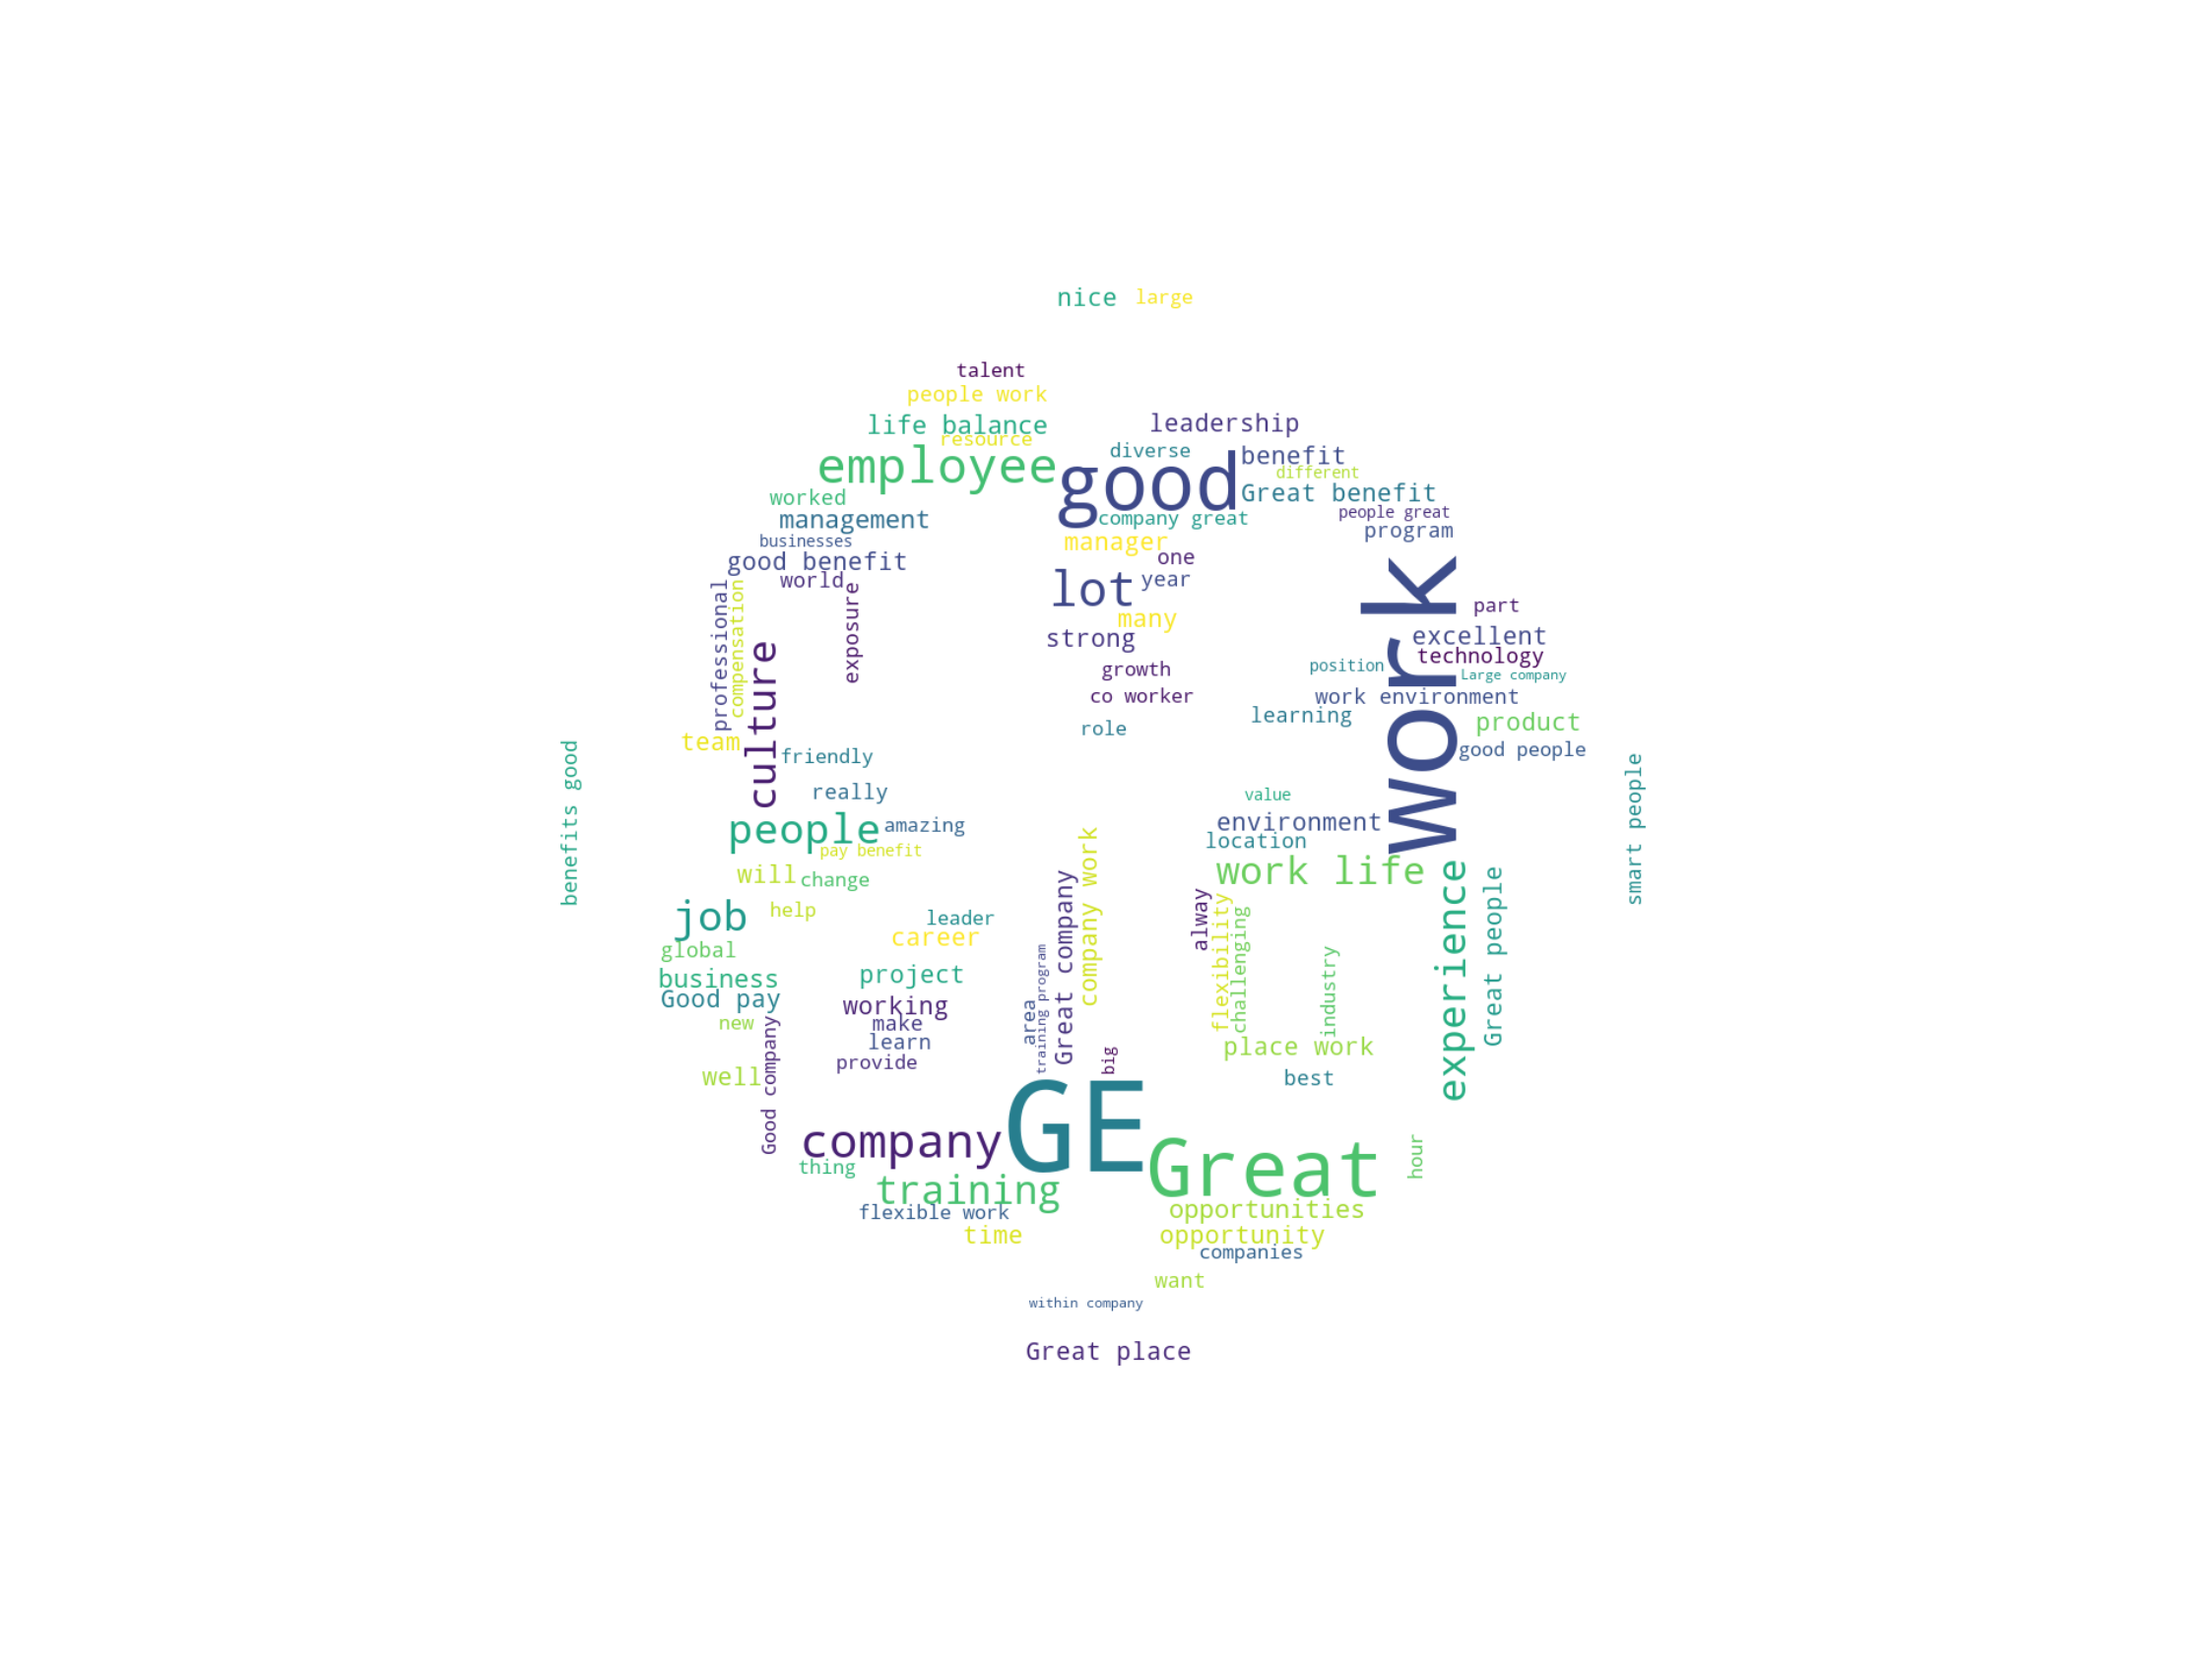

In [278]:
wc.wordCloudFuncGood("ge", path_of_datasets)

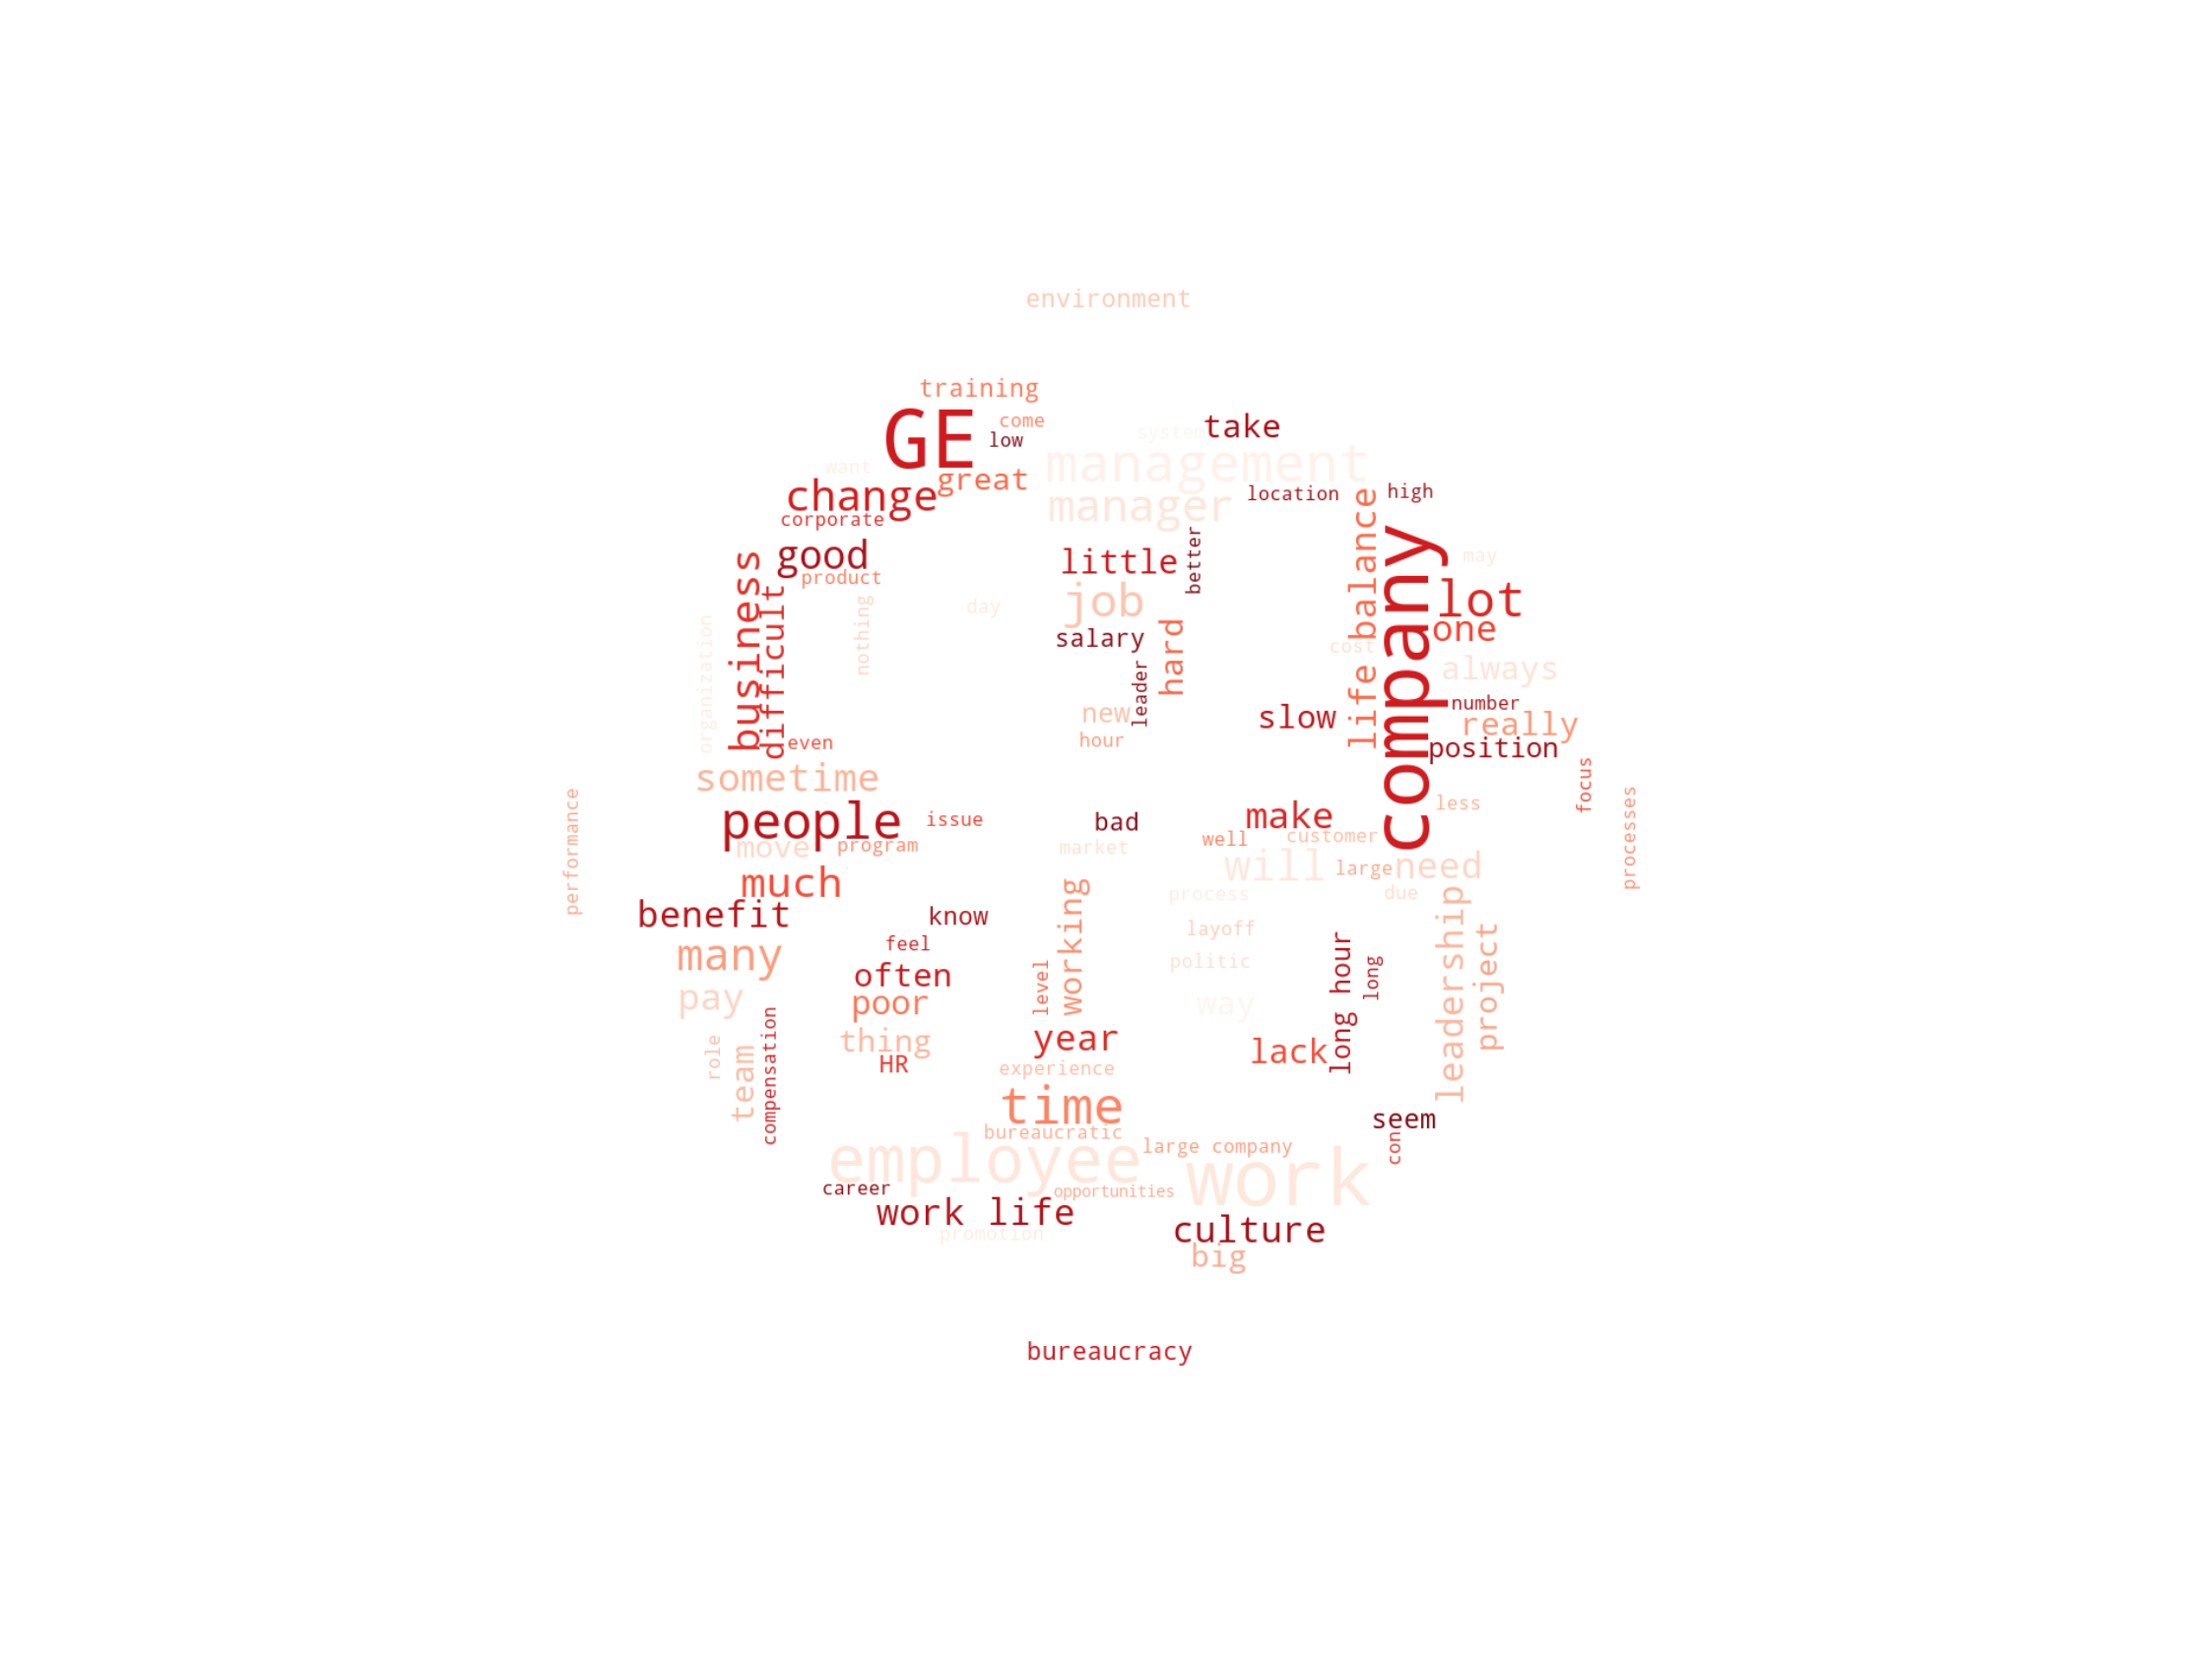

In [279]:
wc.wordCloudFuncBad("ge", path_of_datasets)

### Amazon Pros and Cons

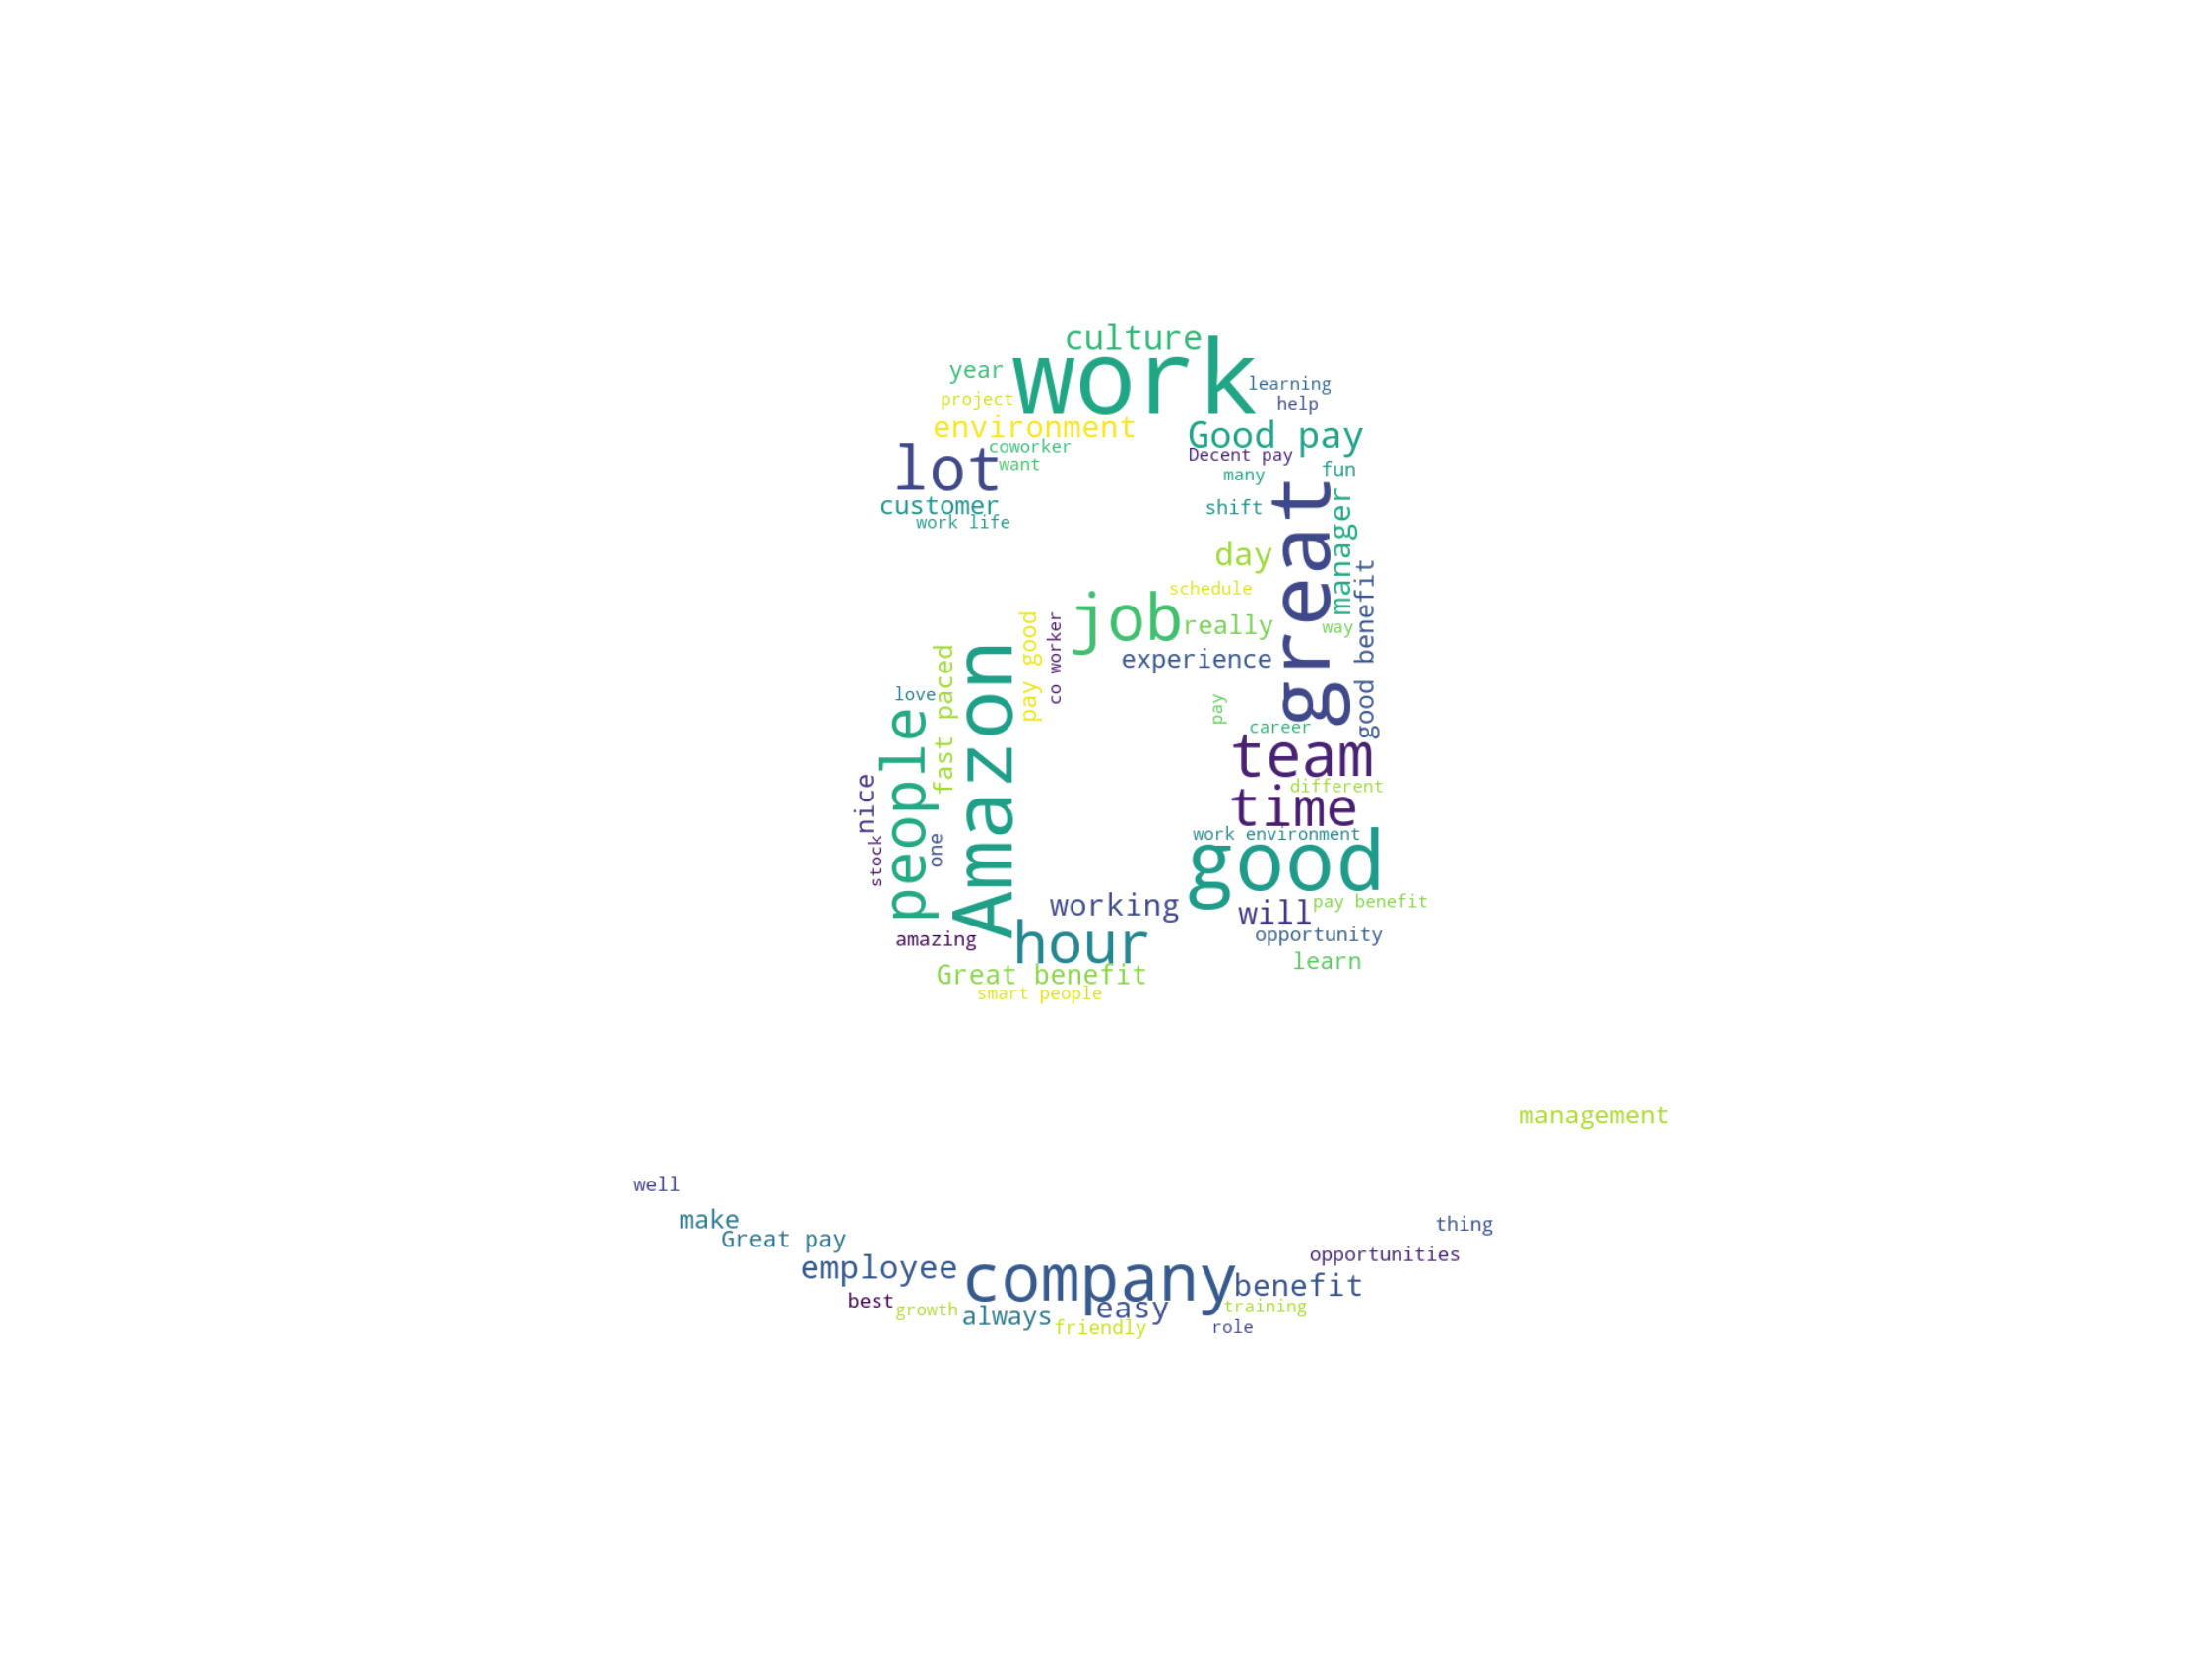

In [280]:
wc.wordCloudFuncGood("amazon", path_of_datasets)

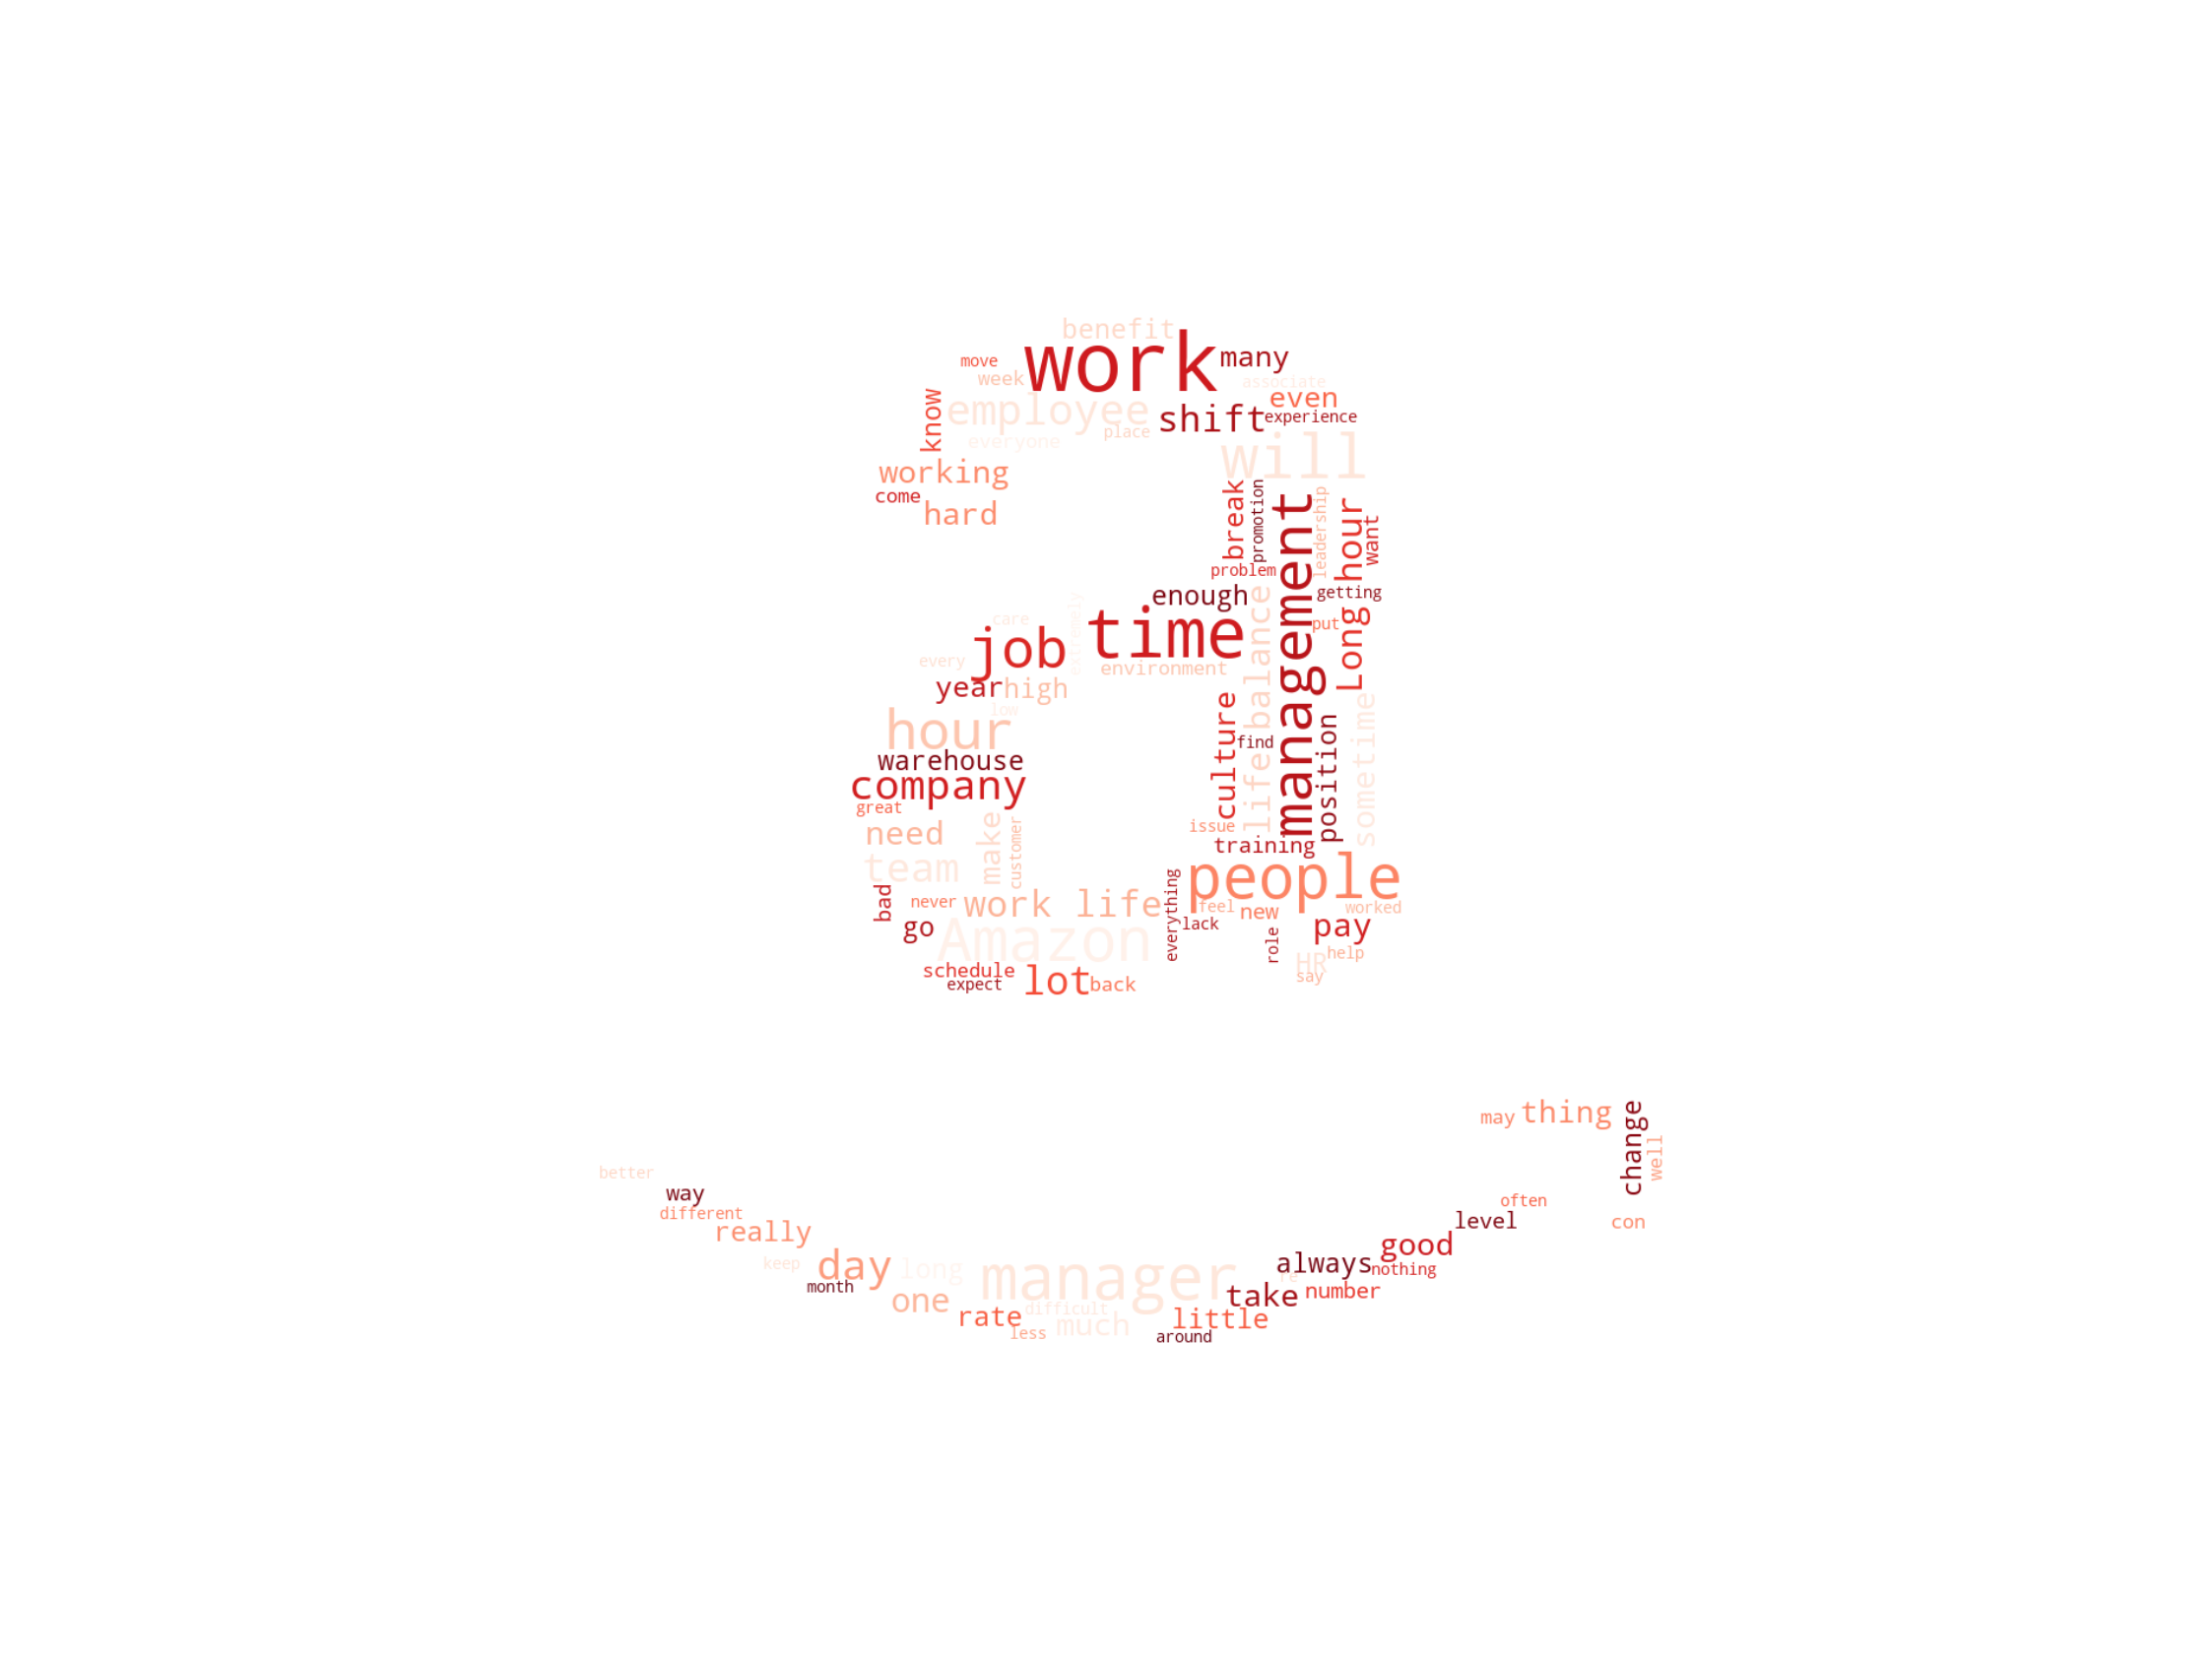

In [281]:
wc.wordCloudFuncBad("amazon", path_of_datasets)

### Northrop Grumman Pros and Cons

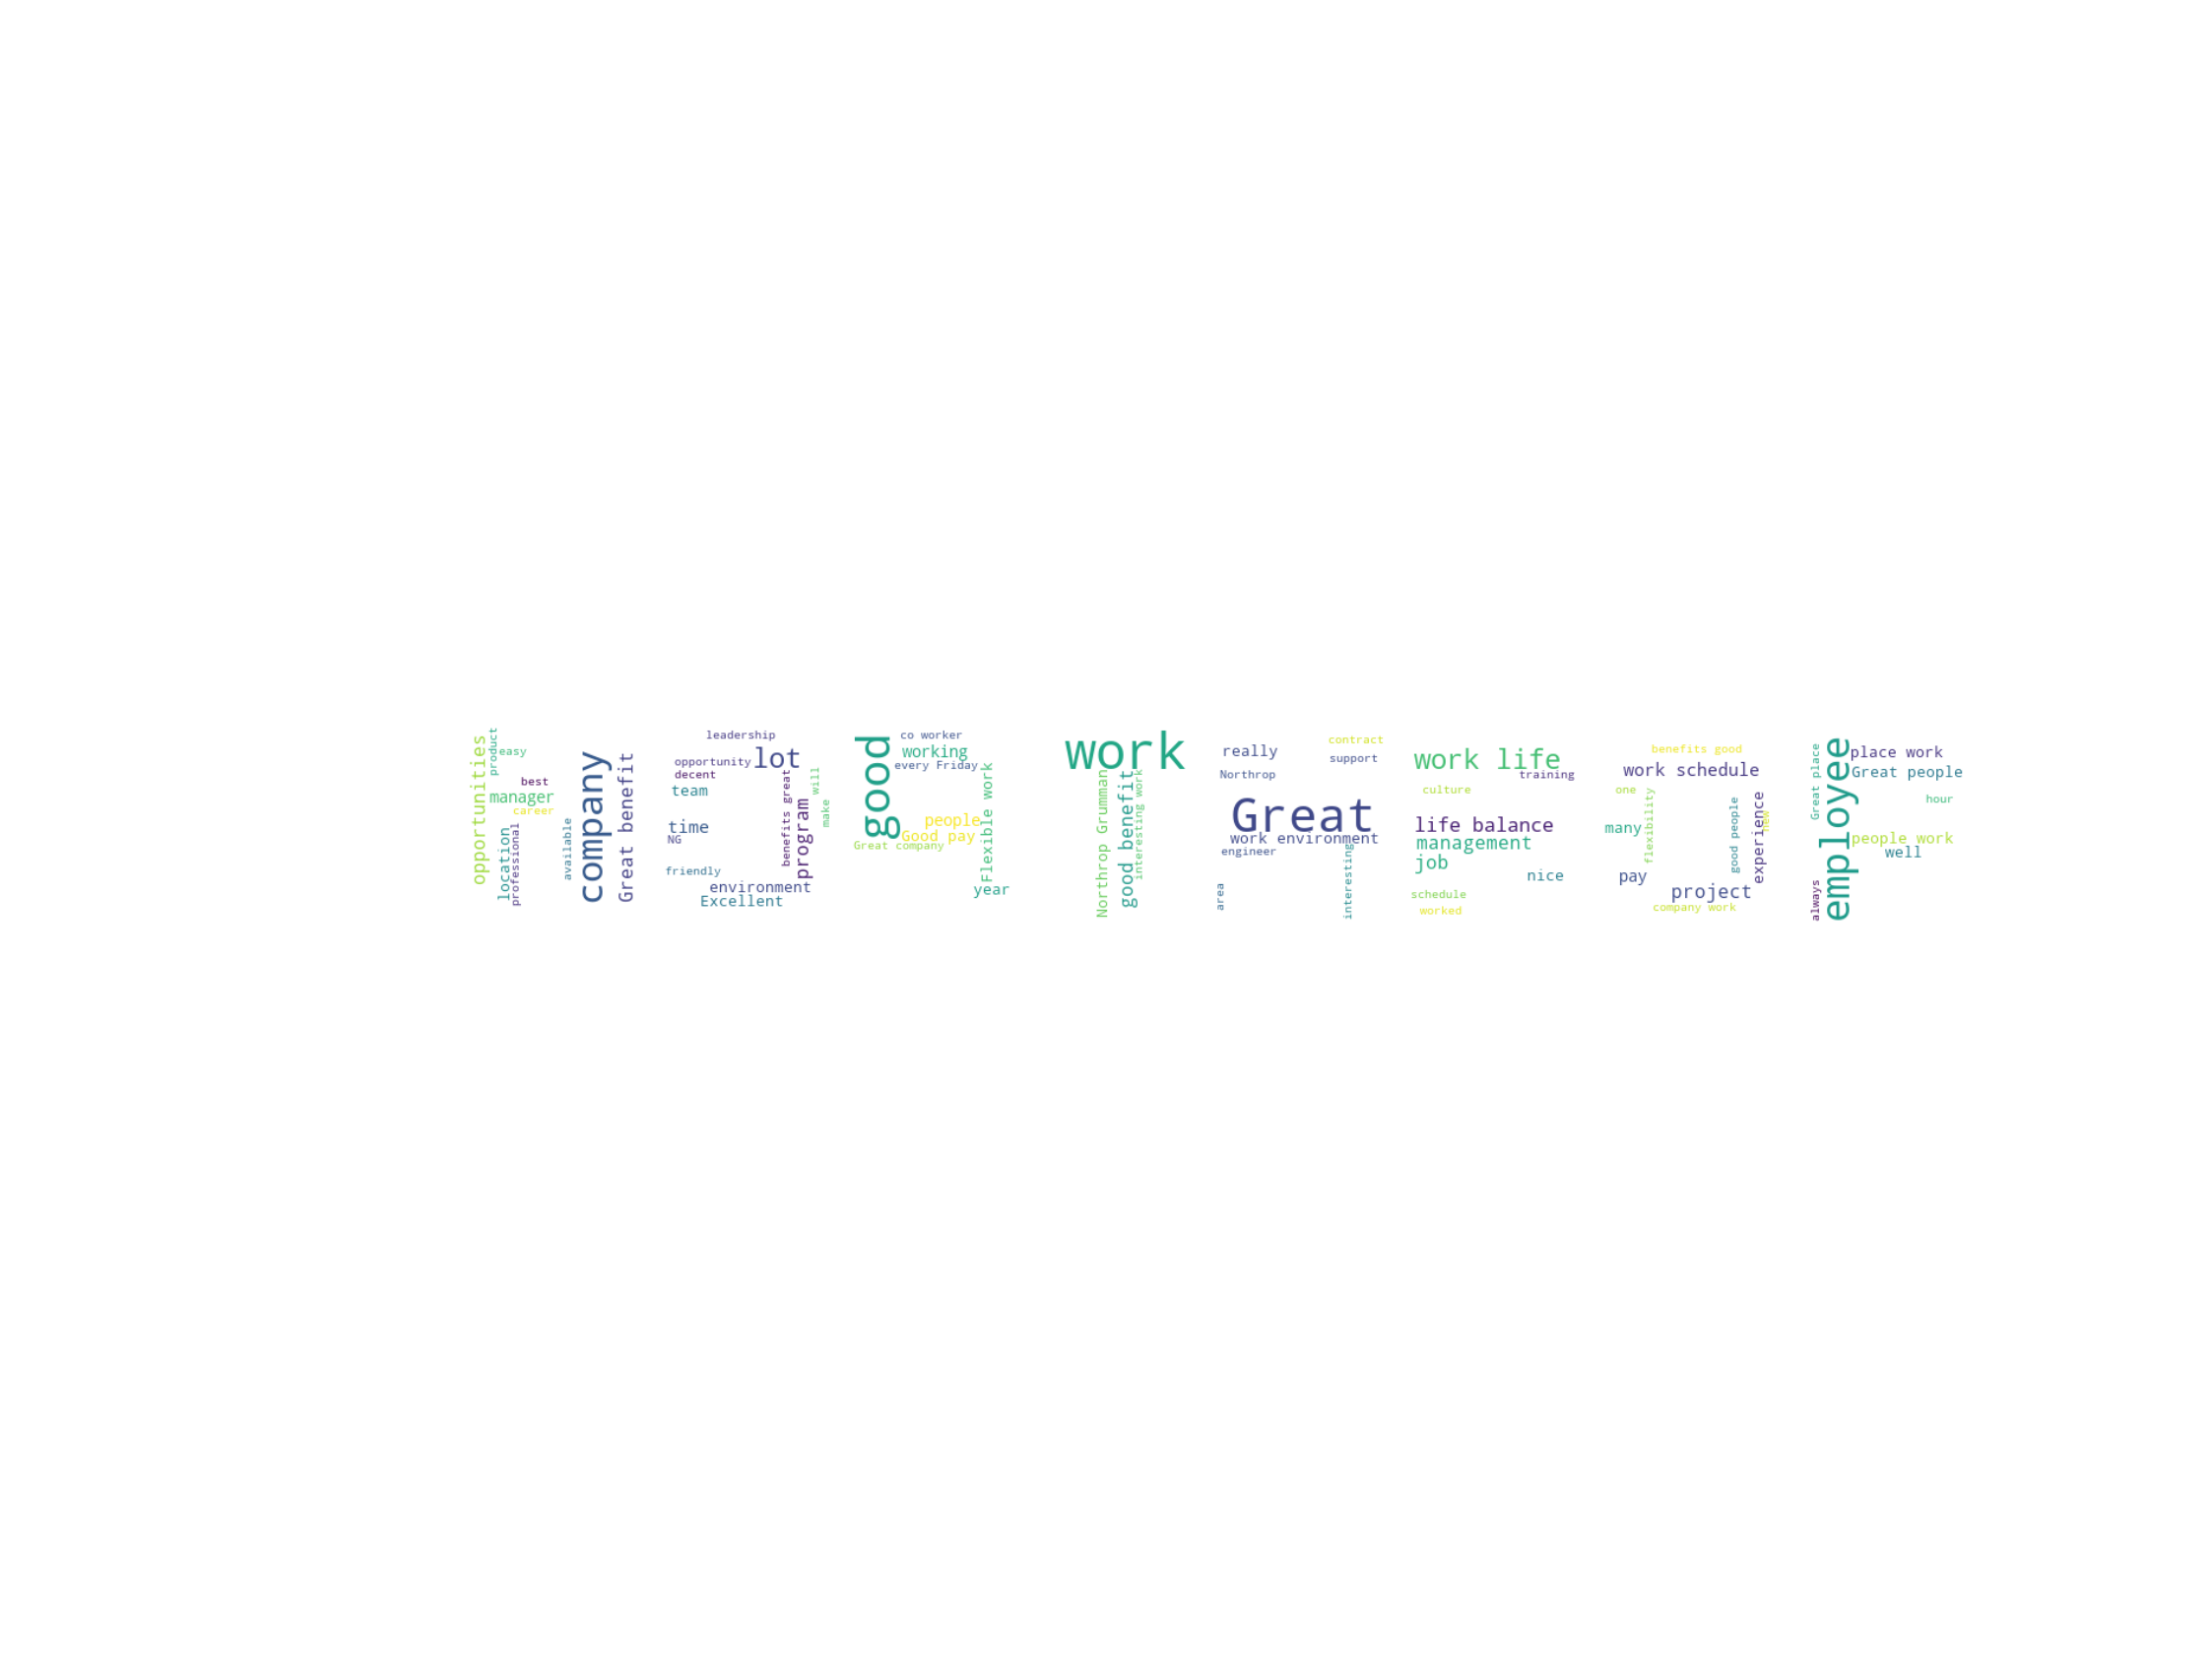

In [282]:
wc.wordCloudFuncGood("northrop", path_of_datasets)

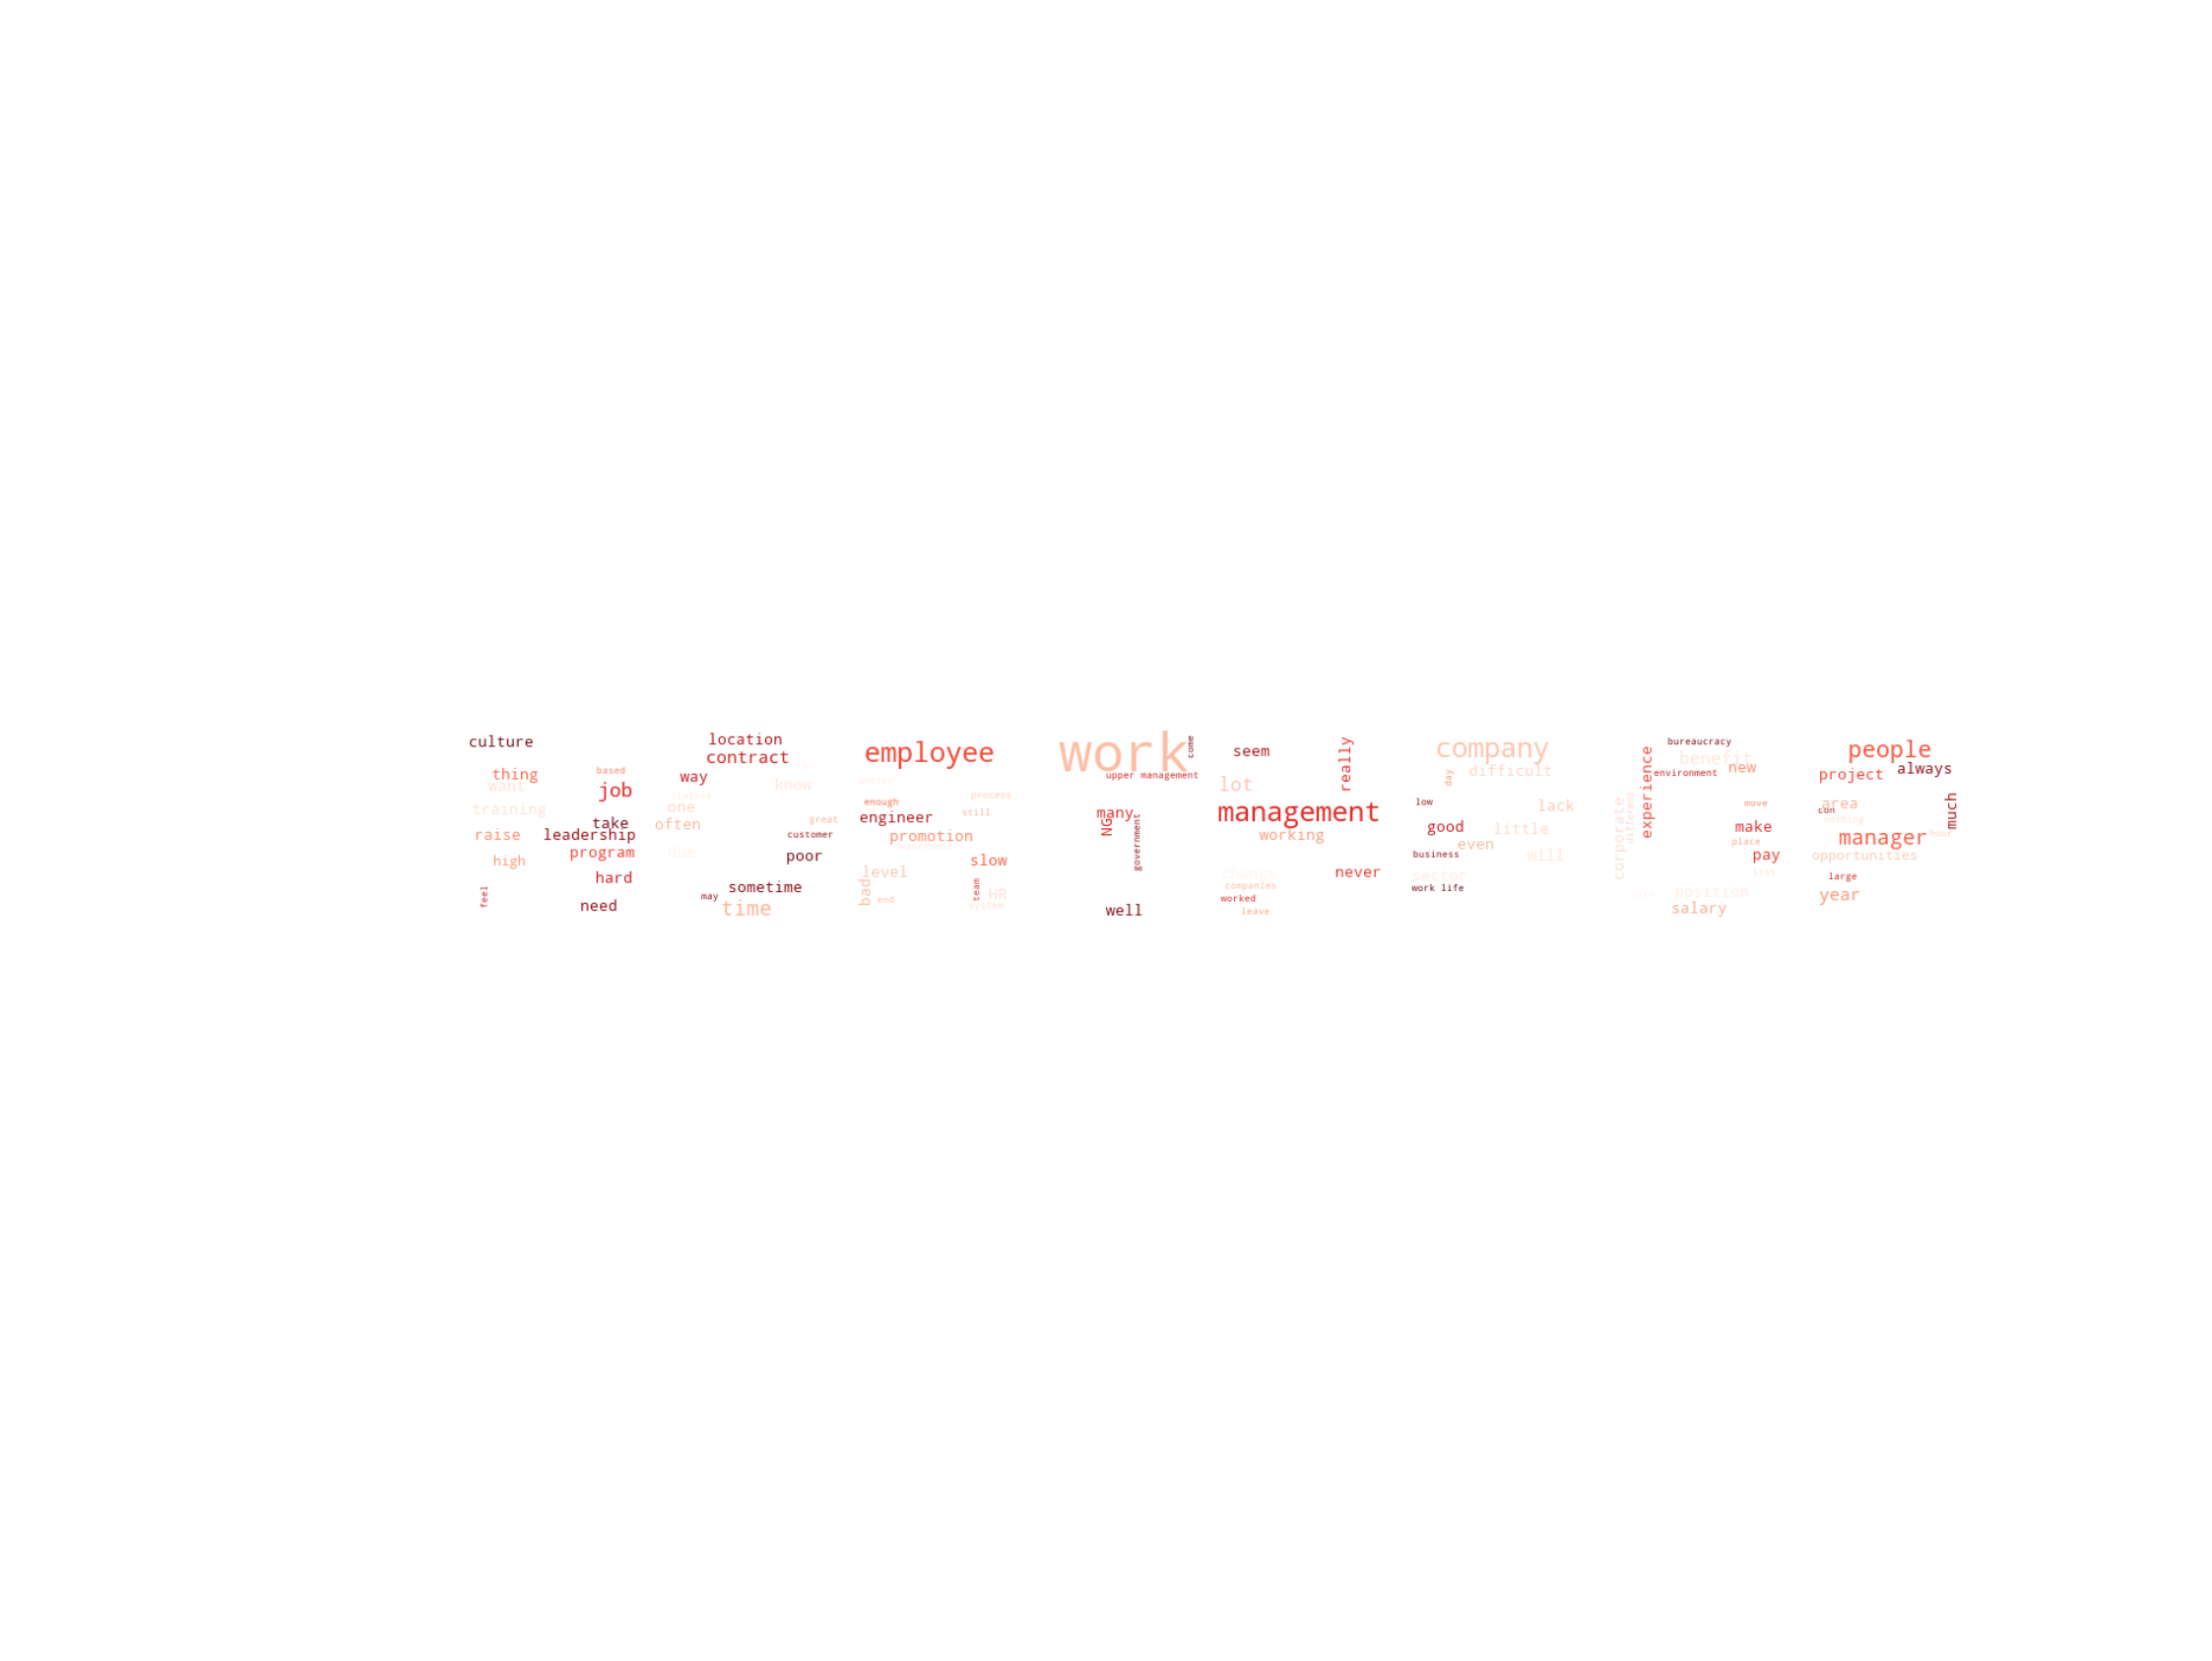

In [283]:
wc.wordCloudFuncBad("northrop", path_of_datasets)

### Microsoft Pros and Cons

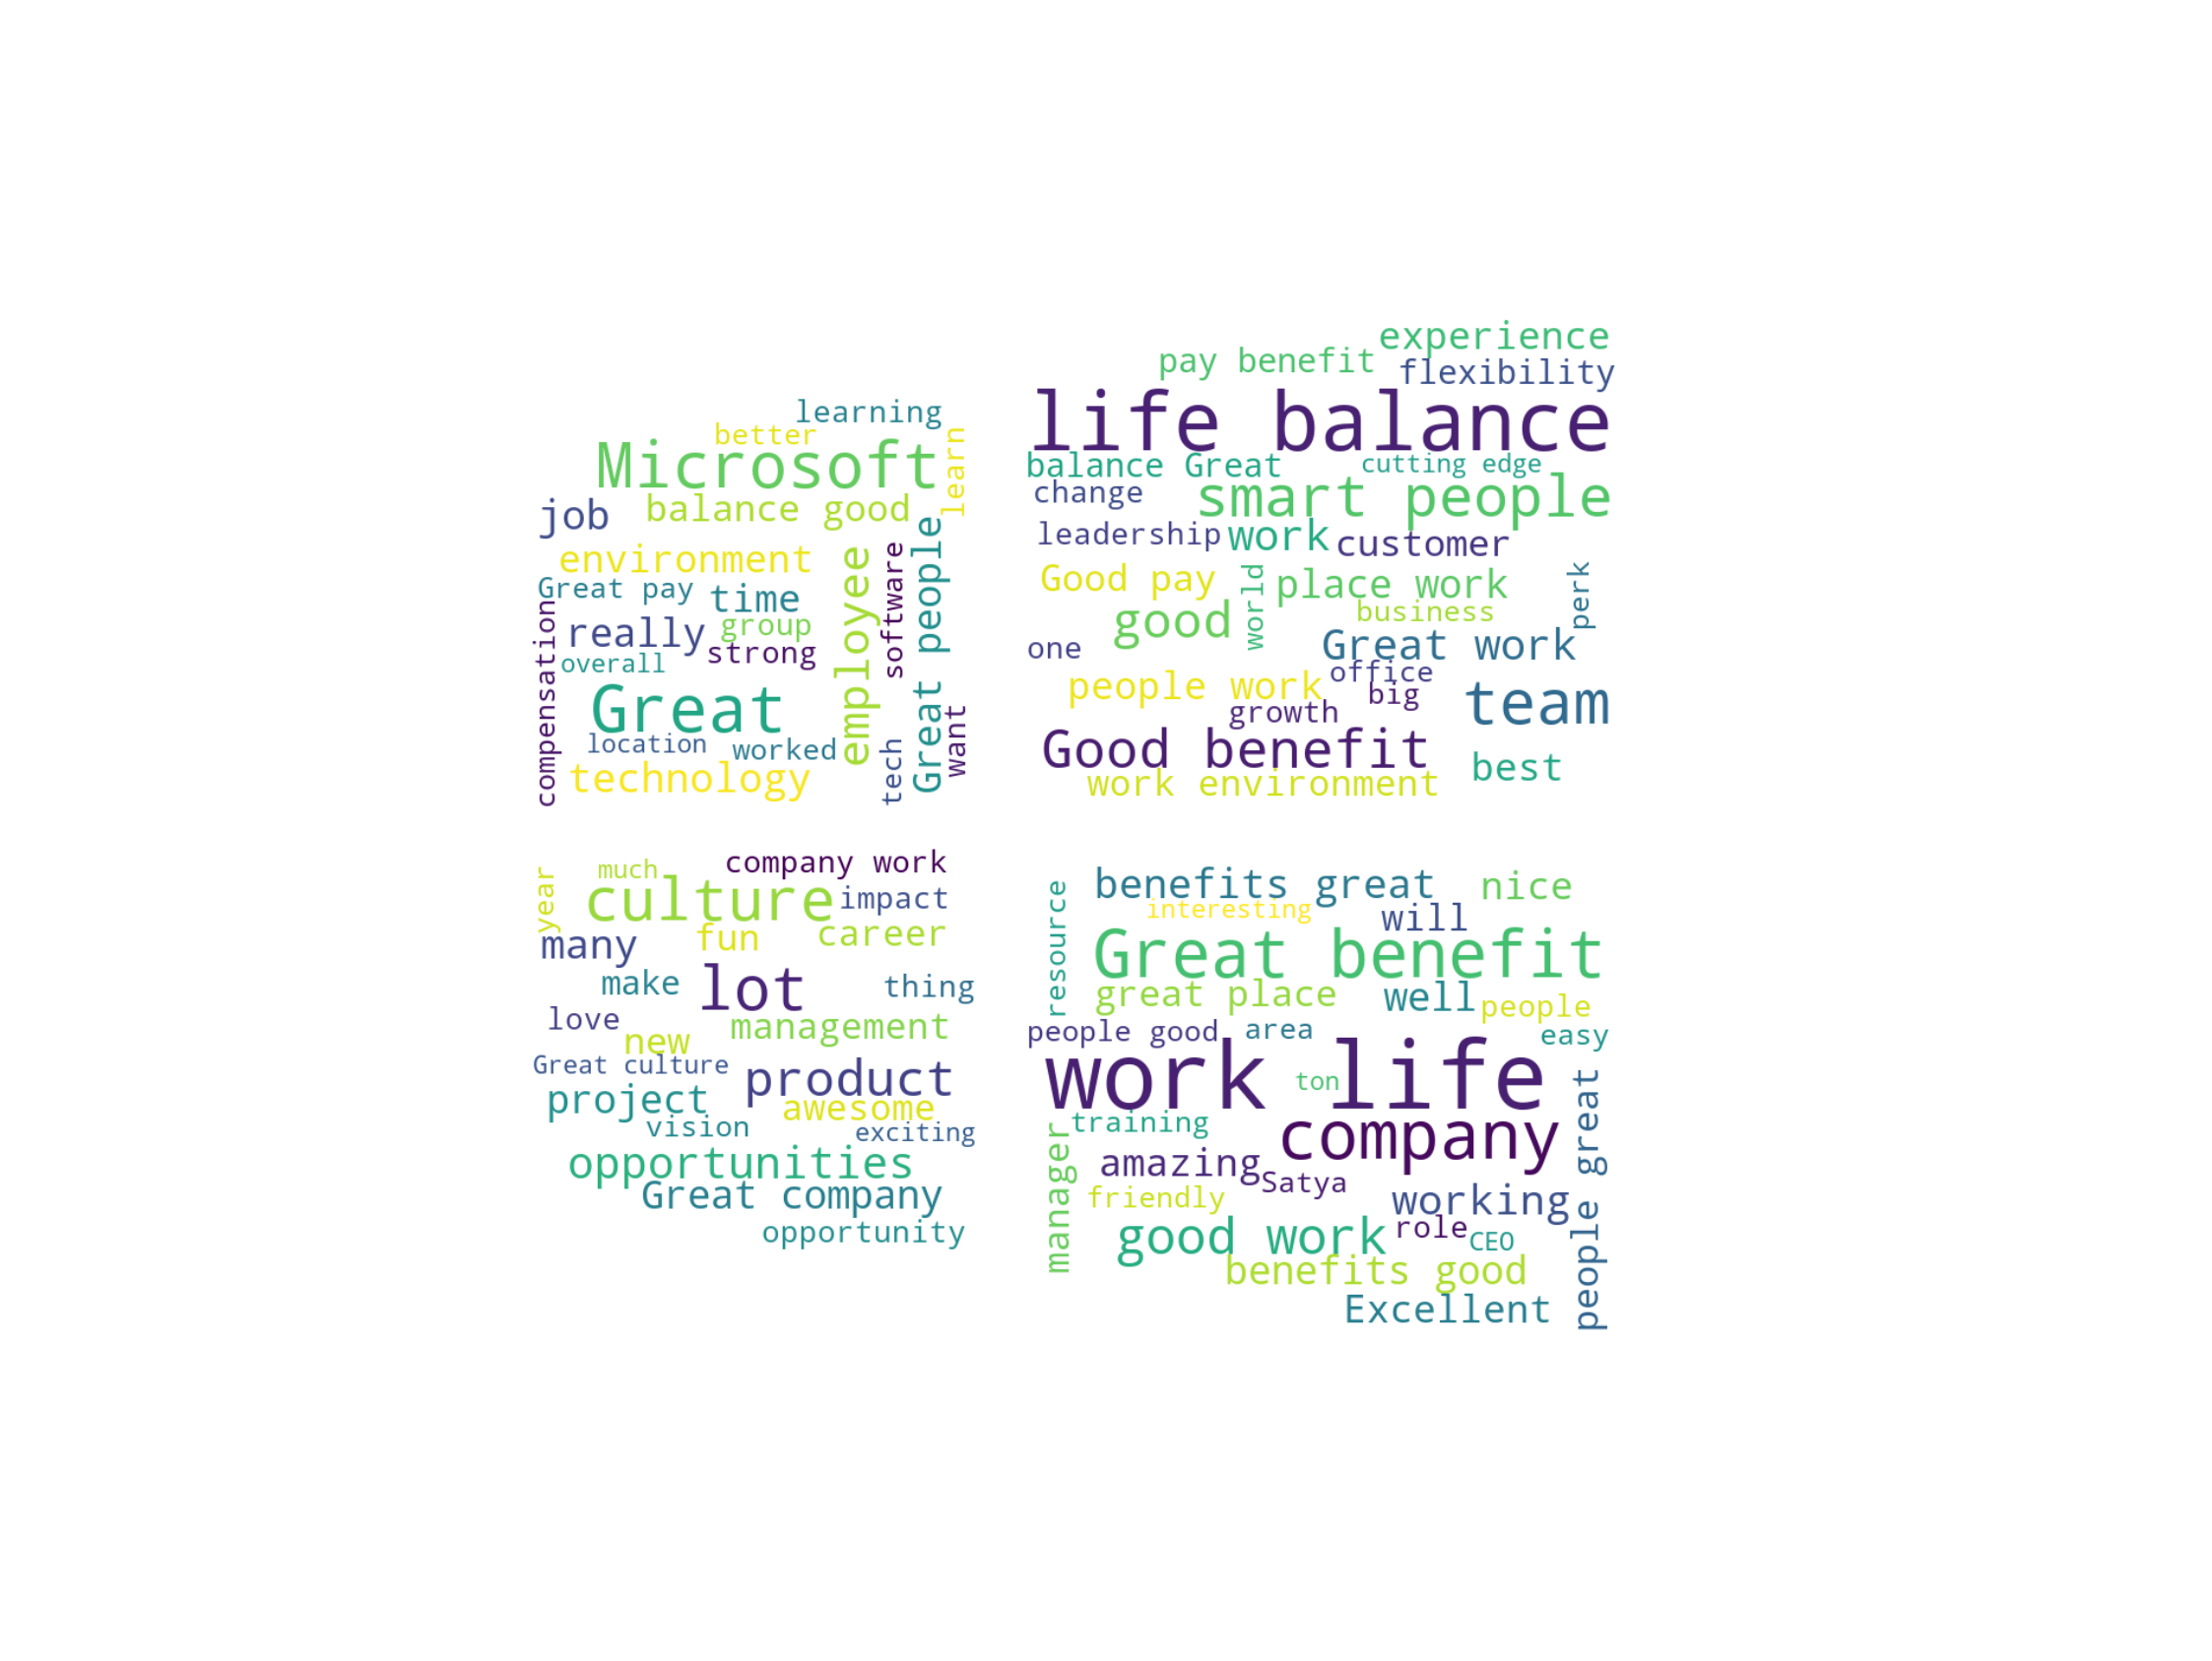

In [284]:
wc.wordCloudFuncGood("ms", path_of_datasets)

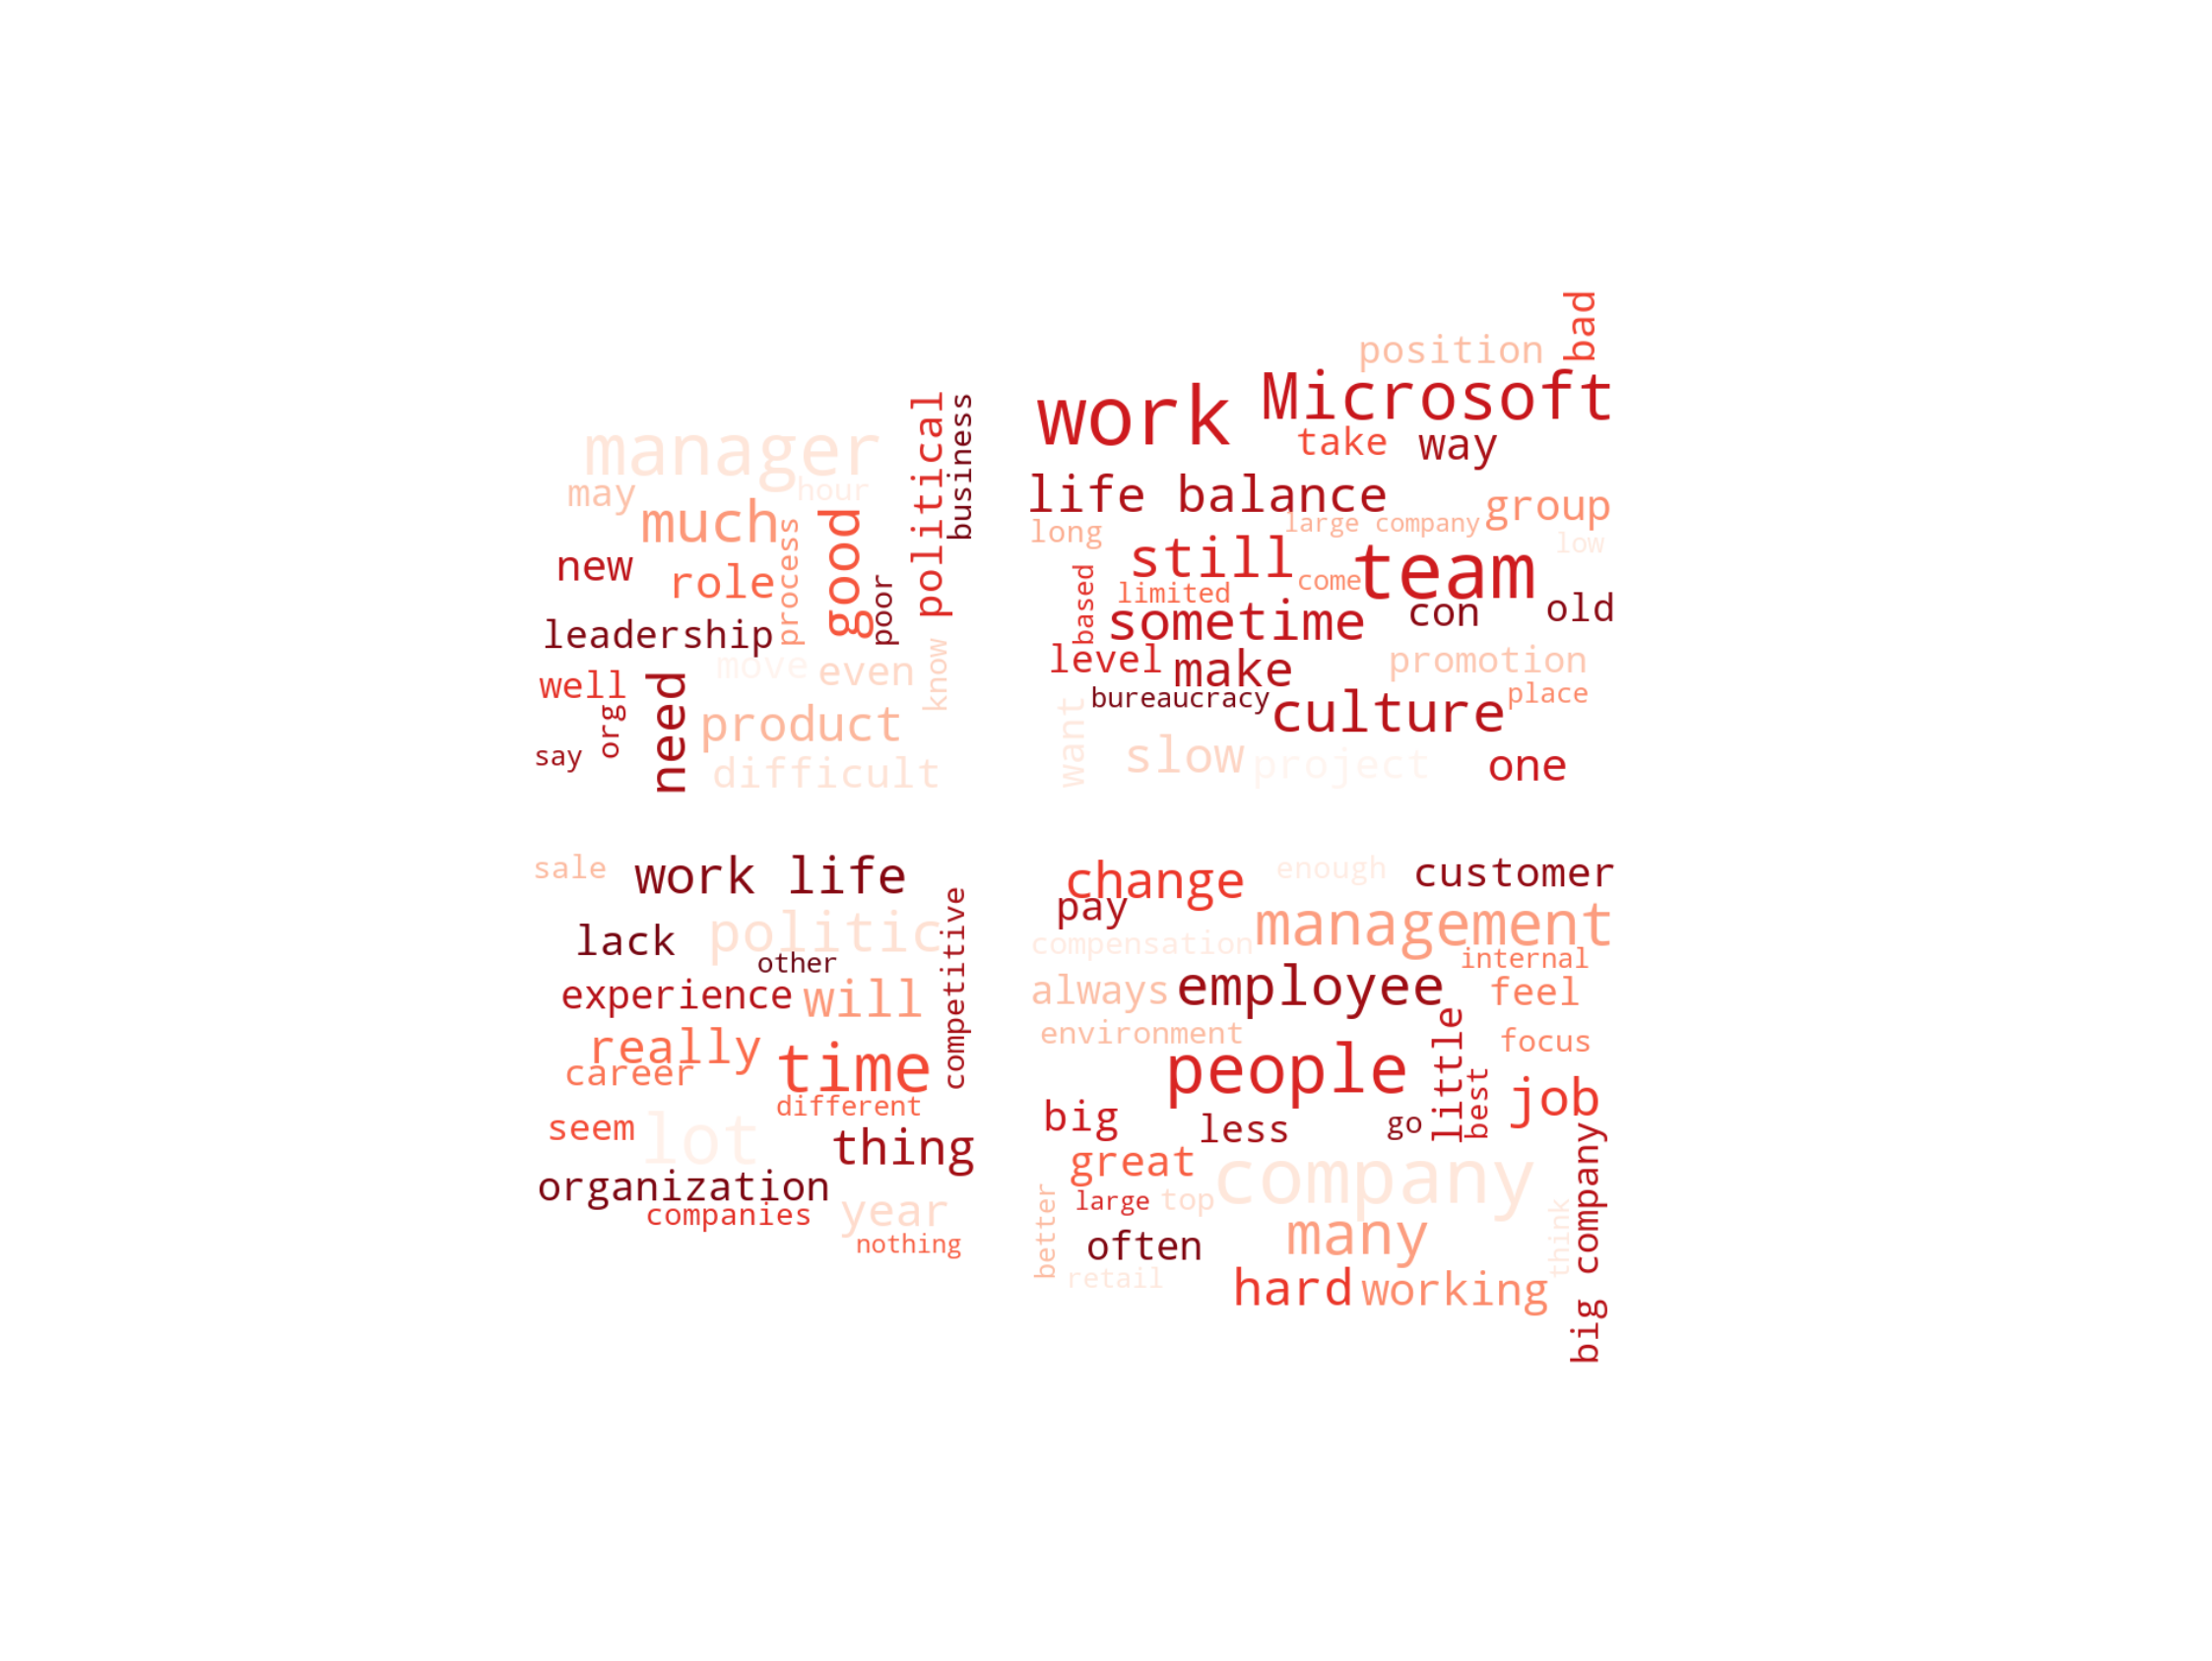

In [285]:
wc.wordCloudFuncBad("ms", path_of_datasets)

# Job Distribution Across Different Locations for Different Companies

In [ ]:
sde_data = pd.concat([google_data,ms_data,amazon_data,app_data], axis=0 )
hd_data = pd.concat([ge_data,intel_data,cisco_data,north_data], axis=0 )
# most popular location for all reviews
lo_dict = {'CA':(37.7792768,-122.4192704),'NY':(40.7305991,-73.9865812),'WA':(47.6038321,-122.3300624),
'TX':(30.2711286,-97.7436995),'MA':(42.3604823,-71.0595678),'IL':(41.8755546,-87.6244212),'GA':(33.7490987,-84.3901849),
'MI':(42.3486635,-83.0567375), 'PA':(40.4416941,-79.9900861),'MO':(40.0149856,-105.2705456),'VA':(37,-80),
'CO':(38,-106),'FL':(27,-83),'NJ':(39,74),'OH':(39.5,-82.5),'DC':(38,-77),'NC':(35,-80),'OR':(44,-120),'AZ':(34,-111.5),
'NM':(34,-106),'WI':(44.5,-89)}

cisco_df = v_tools.process_location(cisco_data)
ge_df = v_tools.process_location(ge_data)
intel_df = v_tools.process_location(intel_data)
north_df = v_tools.process_location(north_data)
hd_df = v_tools.process_location(hd_data)

google_df = v_tools.process_location(google_data)
amazon_df = v_tools.process_location(amazon_data)
ms_df = v_tools.process_location(ms_data)
app_df = v_tools.process_location(app_data)
sde_df = v_tools.process_location(sde_data)

hd_loc = v_tools.process_location(df_hd)
sde_loc = v_tools.process_location(df_sde)

In [ ]:
v_tools.location_distribution(cisco_df,"Cisco")

# Average Ratings Across Different Locations

In [ ]:
columns = ['date','summary', 'job_title','location','overall_rating','work_life_balance_rating',
           'culture_values_rating', 'career_opportunities_rating','comp_benefits_rating',
           'senior_management_rating','main_text','pros','cons','advice_management']

locat_rating = v_tools.cal_rating(sde_data)
work_life_balance = [v[1] for v in list(locat_rating.values())]
wlb_mean = sde_data["work_life_balance_rating"].mean()

culture_values = [v[2] for v in list(locat_rating.values())]
culture_mean = sde_data["culture_values_rating"].mean()

career_opportunities = [v[3] for v in list(locat_rating.values())]
career_mean = sde_data["career_opportunities_rating"].mean()

comp_benefits = [v[4] for v in list(locat_rating.values())]
benefit_mean = sde_data["comp_benefits_rating"].mean()

senior_management = [v[5] for v in list(locat_rating.values())]
manag_mean = sde_data["senior_management_rating"].mean()

In [ ]:
locat_rating = v_tools.cal_rating(sde_data)
state = list(locat_rating.keys())
plt.figure(figsize=(16,6))
plt.style.use('ggplot')
Y1 = work_life_balance
Y2 = culture_values
Y3 = career_opportunities
Y4 = comp_benefits
Y5 = senior_management
size = 10
x = np.arange(size)
total_width, n = 0.8, 5
width = total_width / n
x = x - (total_width - width) / 2
xticks1=state
plt.xticks(x,xticks1,size='small')
plt.xlabel('States')
plt.bar(x, Y1,  width=width, label='work_life_balance')
plt.bar(x + width, Y2, width=width, label='culture_values')
plt.bar(x + 2 * width, Y3, width=width, label='career_opportunities')
plt.bar(x + 3 * width, Y4, width=width, label='comp_benefits')
plt.bar(x + 4 * width, Y5, width=width, label='senior_management')
plt.axhline(y=wlb_mean,linestyle=':', marker='|')
plt.axhline(y=culture_mean,color = 'steelblue',linestyle=':', marker='|')
plt.axhline(y=career_mean,color = 'mediumpurple',linestyle=':', marker='|')
plt.axhline(y=benefit_mean,color = 'gray',linestyle=':', marker='|')
plt.axhline(y=manag_mean,color = 'orange',linestyle=':', marker='|')
plt.title("Specific Rating analysis for software jobs of different locations")
plt.ylim(2.5,4.5)
plt.legend()
plt.savefig("different_ratings_with_location_sde.jpeg")
plt.show()
